# Preventing Hospitalizations with Machine Learning
by Lili Beit


Photo by <a href="https://unsplash.com/@naassomz1?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Naassom Azevedo</a> on <a href="https://unsplash.com/s/photos/happy-elderly-people?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
  
  Photo by <a href="https://unsplash.com/@impulsq?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Online Marketing</a> on <a href="https://unsplash.com/s/photos/medical?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
  
  Photo by <a href="https://unsplash.com/@hush52?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Hush Naidoo</a> on <a href="https://unsplash.com/s/photos/health?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
  Photo by <a href="https://unsplash.com/@dosejuice?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Dose Juice</a> on <a href="https://unsplash.com/s/photos/health?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
  Photo by <a href="https://unsplash.com/@swimstaralex?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Alexander Sinn</a> on <a href="https://unsplash.com/s/photos/machine-learning?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
  Photo by <a href="https://unsplash.com/@markusspiske?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Markus Spiske</a> on <a href="https://unsplash.com/s/photos/machine-learning?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

## Overview

Over the past two decades, the U.S. health care community has taken significant strides in the direction of [value-based care](https://catalyst.nejm.org/doi/full/10.1056/CAT.17.0558).  The federal government and private insurers have started to incentivize providers to deliver high-quality care at low cost, rather than on a fee-for-service basis.  Networks of providers and hospitals that coordinate care are able to improve health outcomes and reduce health care costs.  Under value-based payment systems such as [Medicare's Accountable Care Organization (ACO) program](https://innovation.cms.gov/innovation-models/aco), provider networks that reduce costs are entitled to a share of the savings to the insurer.

## Business Problem

One of the greatest benefits of coordinated care is a reduction in hospitalizations due to better management of chronic diseases. Successfully preventing adverse events helps patients stay healthy, reduces the costs to society of unexpected illness, and creates savings for insurers and ACOs.

Thus, a major goal for ACOs is to identify patients who are at high risk for hospitalization and target them for outreach. By keeping these patients out of the hospital, the ACO can realize its goal of reducing costs to the insurer and keeping a share of the savings.

This project uses machine learning to predict which patients are likely to be hospitalized over the next twelve months.  Using the data in their electronic health records (EHR) and billing systems, ACOs can replicate this model to target patients for care management and reduce hospitalizations.

## Data Understanding

To test models for predicting hospitalizations, I used data from the [2017-2018 National Health and Nutrition Examination Survey (NHANES)](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2017).  This survey, which is sponsored by the Centers for Disease Control, examined a nationally representative sample of over 9,000 people located in counties across the U.S.  NHANES employs a rigorous process to gather demographic, health history, physical examination, and laboratory data from each participant.  For this project I used only a few of the hundreds of variables NHANES makes publicly available.

For the target, I used the variable showing whether participants had been hospitalized over the past 12 months.  However, I altered this variable to show no hospitalizations for patients whose only hospitalization was for childbirth.

As predictors, I used medical conditions that participants had prior to 12 months ago, as well as medications they had been taking for more than a year. I chose which variables to test based on [Agency for Healthcare Research and Quality (AHRQ) statistics](https://www.hcup-us.ahrq.gov/faststats/NationalDiagnosesServlet) showing the most common hospital diagnoses, as well as a recent [American Journal of Managed Care (AJMC) article](https://www.ajmc.com/view/predicting-hospitalizations-from-electronic-health-record-data) whose authors also developed a predictive model for hospitalizations.

Only 8.5% of NHANES participants were hospitalized, reflecting a large class imbalance between hospitalized and non-hospitalized patients, as shown below.


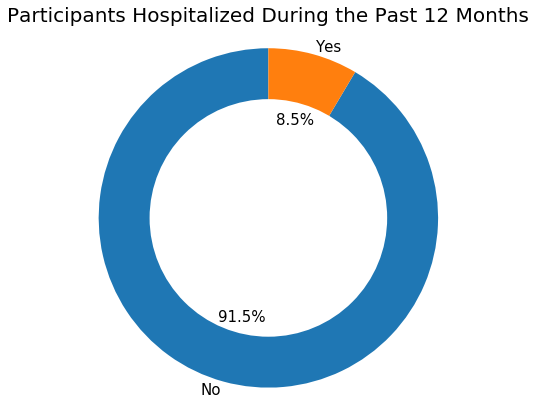

## Data Preparation

Most of the data manipulation for this project involved altering the medical conditions data to show only those conditions which patients had had for 12 months or more.  Since the target is hospitalizations within the past year, I only used medical conditions as predictors if patients were diagnosed with them prior to one year ago.  

The one exception to this rule was Chronic Obstructive Pulmonary Disease (COPD).  NHANES did not include a variable asking when the participant was diagnosed with COPD, unlike for the other medical conditions.  The only variable available asked if patients had ever had COPD.  Since COPD is an important predictor of hospitalizations, I included it in the model even though it is possible some patients did not know they had COPD prior to being hospitalized.

In a handful of cases, participants did not know how old they were when diagnosed with particular conditions, and instead of an age value, there was a dummy value in the data.  I replaced all dummy values with the median value for that column, with the result that when participants did not know their age of diagnosis, I marked them as having the condition for more than 1 year.

One quirk of NHANES data is that all ages over 80 are top-coded at 80, including ages of diagnosis.  Thus, for patients 80 and older who were also diagnosed with conditions at 80 or above, it is impossible to tell whether they had these conditions for longer than 1 year.  I decided to include these conditions as predictors even though it is not possible to tell whether participants had them before they were hospitalized.

Finally, I excluded participants younger than 2 from this analysis, because the variables I focused on were not available for these participants.

The data cleaning and engineering steps I followed can be found in [this notebook](https://github.com/lilisbeit/nhanes/blob/main/data-cleaning-and-feature_engineering.ipynb).

## Modeling

### Model Types and Metrics

I tested several model types including logistic regression, naive Bayes, random forest, and gradient-boosted tree.  I evaluated each model on its recall (sensitivity) score, while ensuring that the precision (specificity) score was not too low.  Since ACOs will need a list of specific patients to target, the goal of this project was to correctly identify as many hospitalized patients as possible, with a lesser focus on excluding patients who were not hospitalized.  Since reaching high-risk patients is the primary goal, and outreach will benefit all patients, it pays to have more false positives than false negatives.  I set a minimum threshold of 0.2 for precision, meaning that the ratio of false positive to true positives cannot exceed 4:1.  

I also calculated the Receiver Operating Curve (ROC-AUC) score for reference, because the [AJMC article](https://www.ajmc.com/view/predicting-hospitalizations-from-electronic-health-record-data) referenced above used this metric to evaluate models.  The study authors used EHR and billing data to predict which patients would be hospitalized over the next 6 months, and built a model with an ROC-AUC score of 0.846.

All scores were calculated by running five-fold cross-validation and taking the mean of each metric.

### Final Model

The final model is a logistic regression which had a recall score of 0.69, a precision score of 0.21 and an ROC-AUC score of 0.74, when tested on a hold-out set.  This model narrowly beat out a random forest model which had a higher recall of 0.70, but a lower precision of 0.18, below the threshold of 0.2.  The final model included the following features:

* circulatory conditions
* respiratory conditions
* diabetes
* arthritis
* liver conditions
* cancer
* age
* race
* total number of prescription drugs

In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import utils as ut

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_colwidth', 1000)

### Feature Selection for Baseline Model

In the baseline model, I included some of the medical conditions most likely to lead to hospitalization, according to the [AHRQ](https://www.hcup-us.ahrq.gov/faststats/NationalDiagnosesServlet) and the [AJMC article](https://www.ajmc.com/view/predicting-hospitalizations-from-electronic-health-record-data):


* circulatory system (in particular heart failure)
* respiratory system (in particular COPD)
* diabetes
* osteoarthritis
* age

Since there are only 9,000 rows in my data, I chose to include around 10 variables as a first pass, since more may make the model's predictions ungeneralizable due to the curse of dimensionality.

Other conditions linked to hospitalizations include:
* liver conditions (included later)
* sickle cell anemia (not in NHANES data)
* osteoporosis / hip fractures (add in a future iteration of this project)
* alcohol-related disorders (add in a future iteration of this project)
* depressive disorders (add in a future iteration of this project)

In this model, the variables are continuous, showing how many years the participant has had each medical condition

In [2]:
# import df with continuous variables

yrs_df_3 = pd.read_csv('data/yrs_df').set_index('SEQN')
yrs_df_3


RIDAGEYR  yrs_osteoarth  yrs_other_arth  yrs_heart_fail  \
SEQN                                                                    
93703.00000    2.00000        0.00000         0.00000         0.00000   
93704.00000    2.00000        0.00000         0.00000         0.00000   
93705.00000   66.00000        0.00000         2.00000         0.00000   
93706.00000   18.00000        0.00000         0.00000         0.00000   
93707.00000   13.00000        0.00000         0.00000         0.00000   
...                ...            ...             ...             ...   
102952.00000  70.00000        0.00000         0.00000         0.00000   
102953.00000  42.00000        0.00000         0.00000         0.00000   
102954.00000  41.00000        0.00000         0.00000         0.00000   
102955.00000  14.00000        0.00000         0.00000         0.00000   
102956.00000  38.00000       11.00000         0.00000         0.00000   

              yrs_heart_cond  ever_had_COPD  yrs_emphysema  yrs_chron_bronc  \
SEQN                                                                          
93703.00000          0.00000        0.00000        0.00000          0.00000   
93704.00000          0.00000        0.00000        0.00000          0.00000   
93705.00000          0.00000        0.00000        0.00000          0.00000   
93706.00000          0.00000        0.00000        0.00000          0.00000   
93707.00000          0.00000        0.00000        0.00000          0.00000   
...                      ...            ...            ...              ...   
102952.00000         0.00000        0.00000        0.00000          0.00000   
102953.00000         0.00000        0.00000        0.00000          0.00000   
102954.00000         0.00000        0.00000        0.00000          0.00000   
102955.00000         0.00000        0.00000        0.00000          0.00000   
102956.00000         0.00000        0.00000        0.00000          0.00000   

              yrs_asthma  yrs_diabetes  yrs_taking_ins  HUQ071  
SEQN                                                            
93703.00000      0.00000       0.00000         0.00000 0.00000  
93704.00000      0.00000       0.00000         0.00000 0.00000  
93705.00000      0.00000       0.00000         0.00000 0.00000  
93706.00000      0.00000       0.00000         0.00000 0.00000  
93707.00000      0.00000       0.00000         0.00000 0.00000  
...                  ...           ...             ...     ...  
102952.00000     0.00000       0.00000         0.00000 0.00000  
102953.00000     0.00000       0.00000         0.00000 0.00000  
102954.00000     0.00000       0.00000         0.00000 0.00000  
102955.00000     0.00000       0.00000         0.00000 0.00000  
102956.00000     0.00000       0.00000         0.00000 0.00000  

[8894 rows x 12 columns]

In [3]:
# minority class is just 8.5 %

yrs_df_3['HUQ071'].value_counts(normalize=True)


0.00000   0.91455
1.00000   0.08545
Name: HUQ071, dtype: float64

In [4]:
# create df to plot doughnut chart

target_ratio = pd.DataFrame(yrs_df_3['HUQ071'].value_counts(normalize=True))
target_ratio.rename(index = {0.00000: 'No', 1.00000: 'Yes'}, inplace=True)
target_ratio


HUQ071
No  0.91455
Yes 0.08545

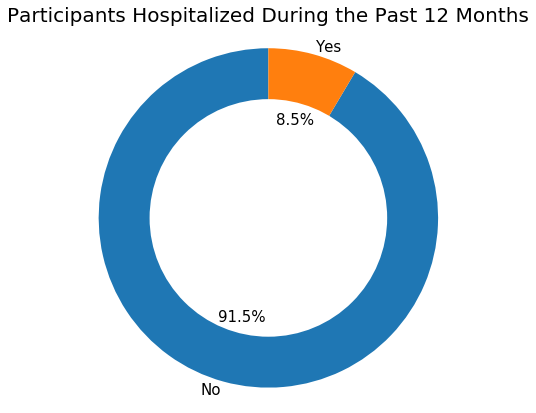

In [5]:
# plot doughnut chart to show target distribution
# minority class is very small

plt.rcParams['font.size'] = 15

fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.pie(target_ratio['HUQ071'], 
        labels=target_ratio.index,
        autopct='%1.1f%%',
        labeldistance=1.05,
        startangle=90,
        textprops = {"fontsize":15})
ax1.set_title('Participants Hospitalized During the Past 12 Months', pad=10, fontsize=20)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig('images/label-distribution-pie-1', bbox_inches='tight')


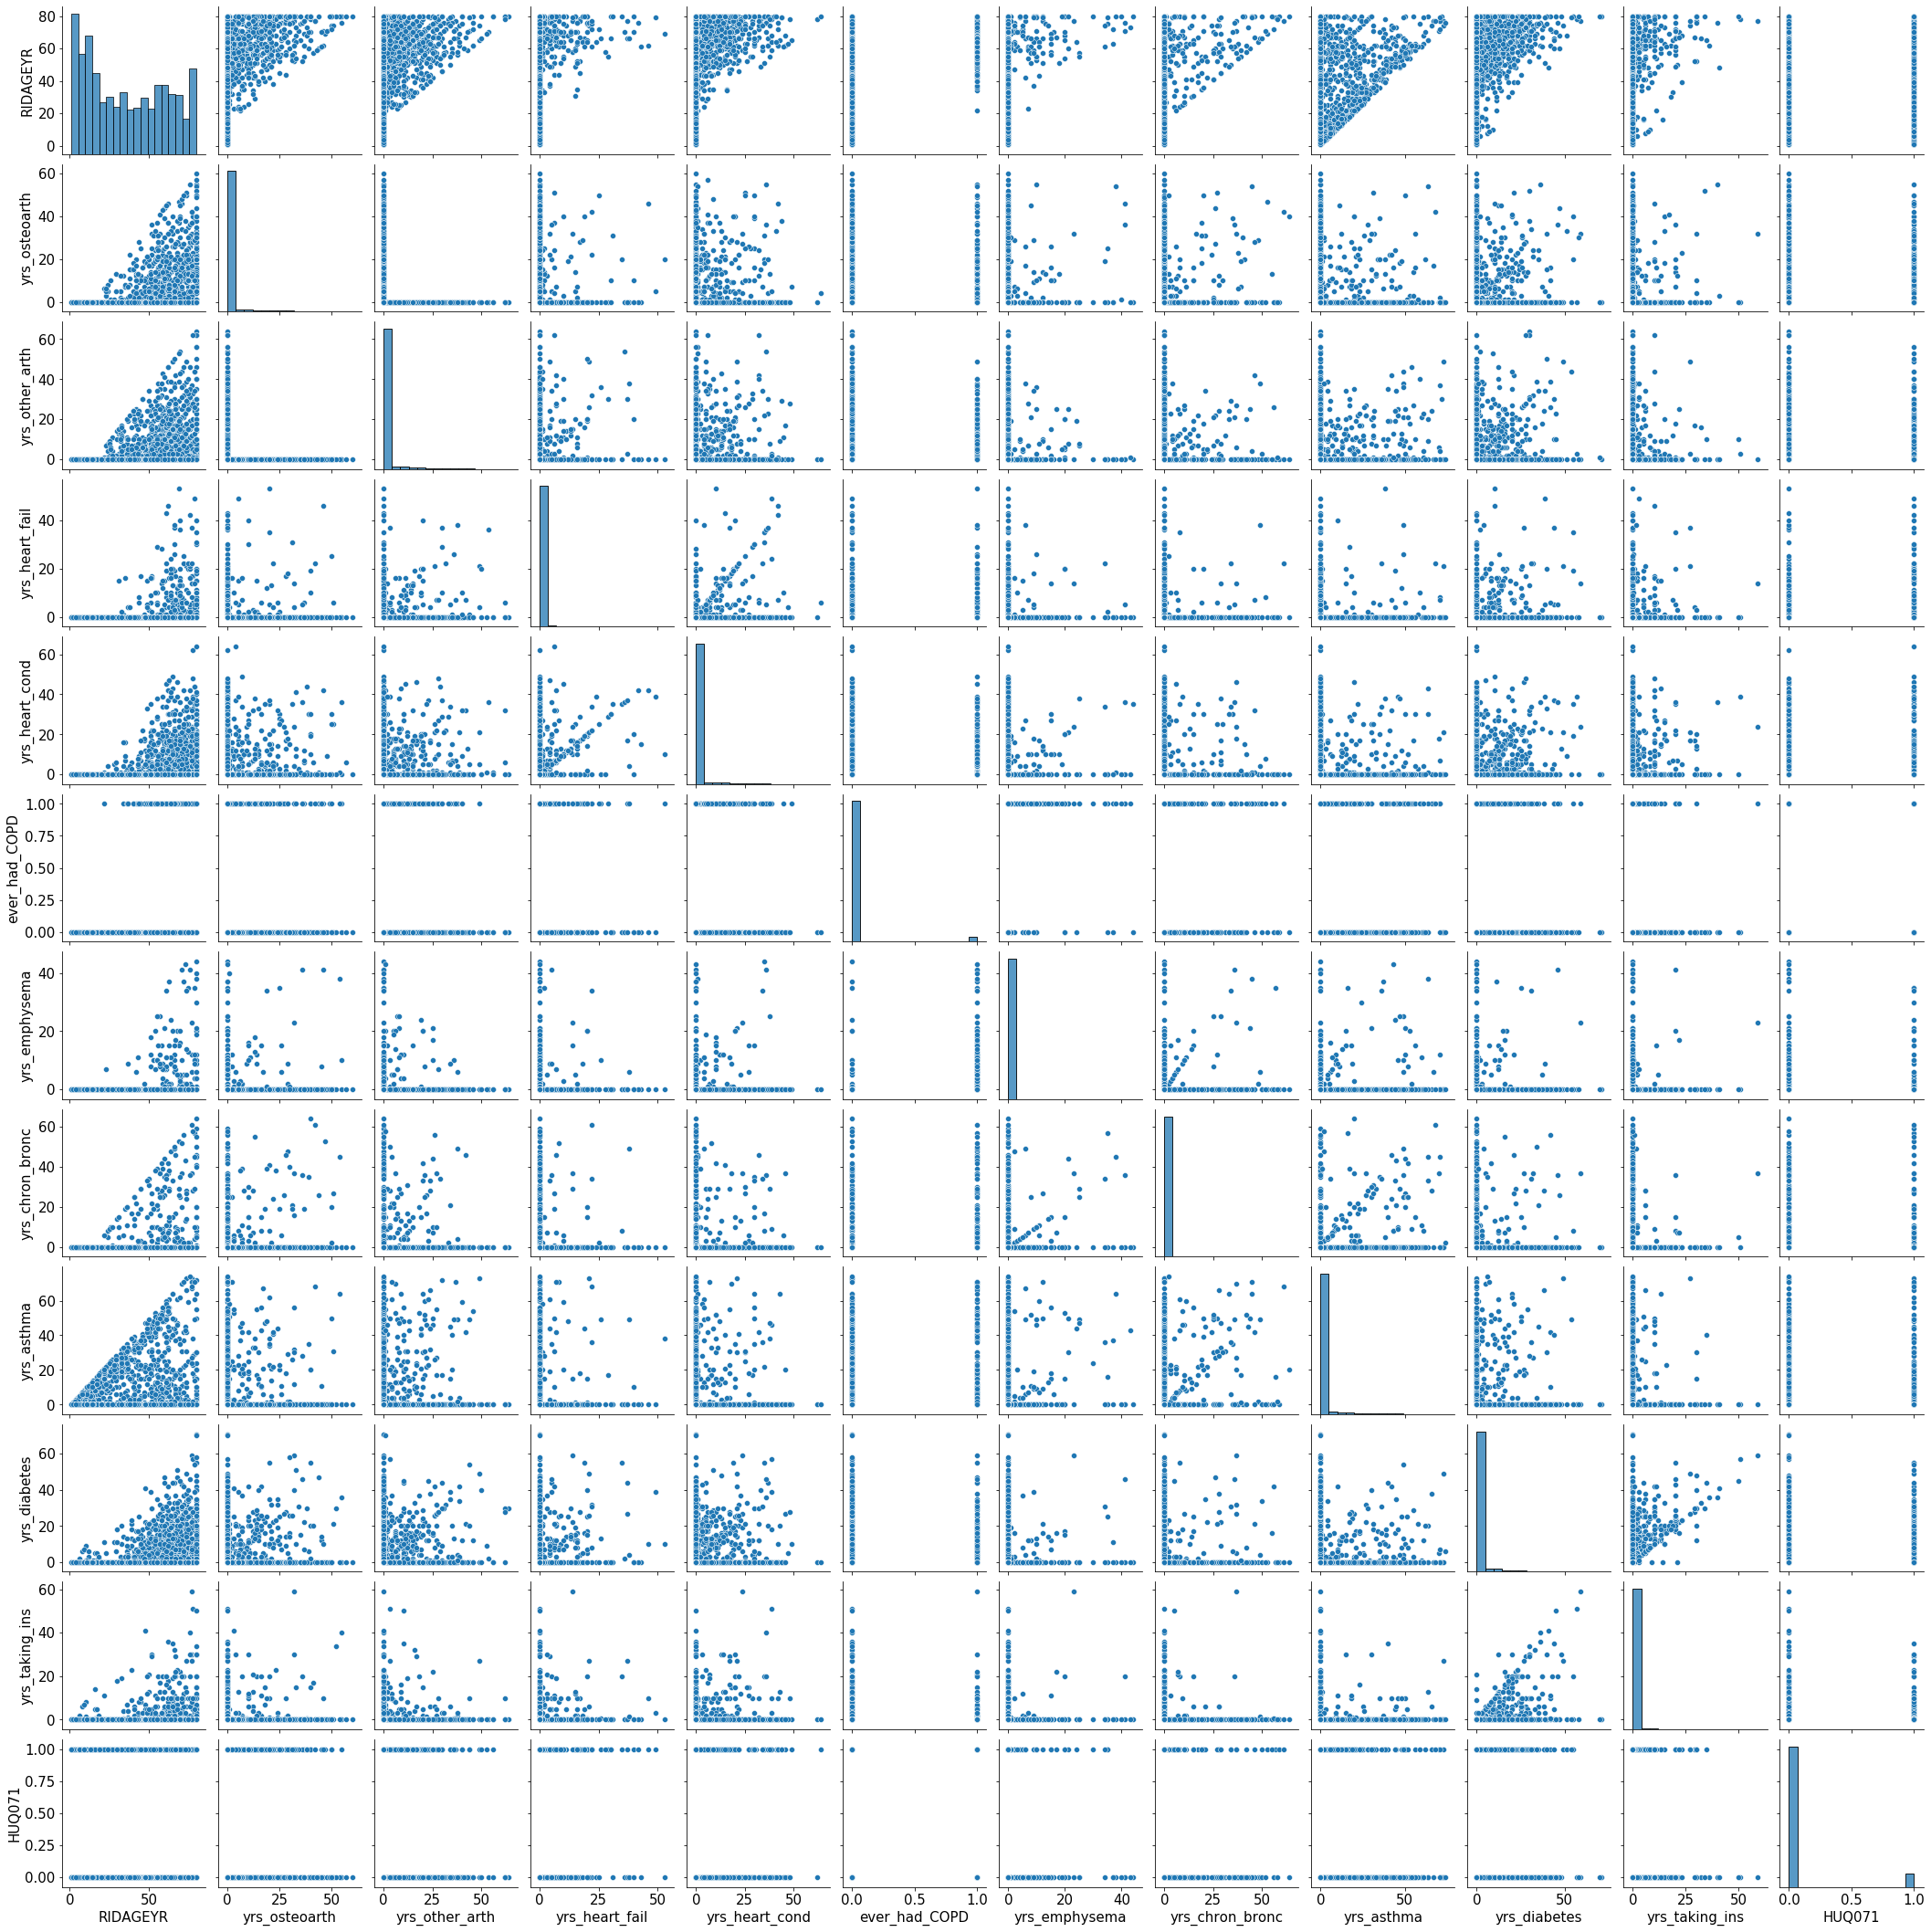

In [6]:
# check correlations between variables

sns.pairplot(yrs_df_3)


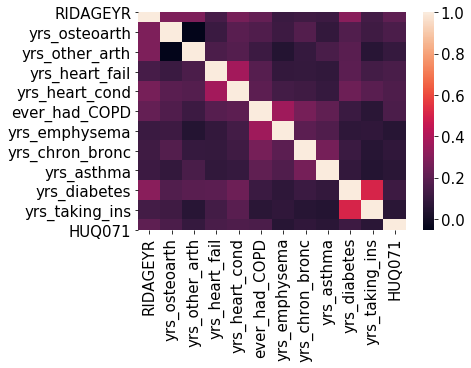

In [7]:
# check correlations with heatmap

corr = yrs_df_3.corr()
sns.heatmap(corr)

# no strong correlations
# even diabetes and taking insulin is only 50% correlated
# nothing is strongly correlated with hospitalization (HUQ071)


### Baseline Model: Logistic regression using continuous variables

In [8]:
# define X and y

X = yrs_df_3.drop(columns = ['HUQ071'])
y = yrs_df_3['HUQ071']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)


Classifier: LogisticRegression(max_iter=10000)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.719


Train mean recall: 0.03 +/- 0.01
Train mean precision: 0.59 +/- 0.07
Train mean ROC-AUC: 0.51 +/- 0.0


Test mean recall: 0.02 +/- 0.01
Test mean precision: 0.45 +/- 0.18
Test mean ROC-AUC: 0.51 +/- 0.01


Feature weights: 
                   weight  abs_weight
RIDAGEYR         1.67940     1.67940
yrs_heart_fail   1.61490     1.61490
yrs_heart_cond   1.60670     1.60670
yrs_osteoarth    1.48310     1.48310
yrs_other_arth   0.98410     0.98410
ever_had_COPD    0.71110     0.71110
yrs_taking_ins   0.66050     0.66050
yrs_chron_bronc  0.21340     0.21340
yrs_emphysema   -0.10480     0.10480
yrs_asthma       0.08680     0.08680
yrs_diabetes     0.06540     0.06540 

Confusion matrices for each fold test set: 



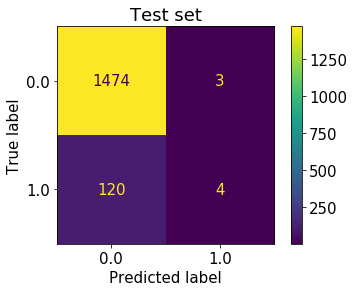

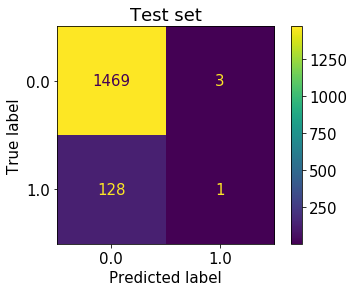

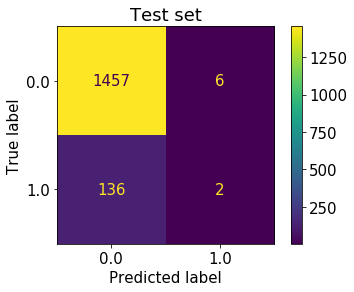

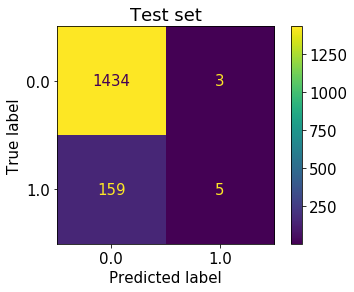

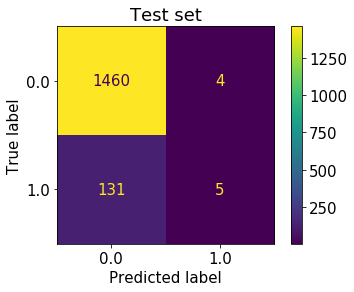

In [9]:
# instantiate and evaluate logistic regression model

logreg = LogisticRegression(max_iter=10000)

ut.k_fold_validator(X=X_training, y=y_training, classifier=logreg, cv=5)


### Model 2: Logistic regression using continuous variables and balanced class weights

Classifier: LogisticRegression(class_weight='balanced', max_iter=10000)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.719


Train mean recall: 0.62 +/- 0.01
Train mean precision: 0.16 +/- 0.01
Train mean ROC-AUC: 0.66 +/- 0.01


Test mean recall: 0.62 +/- 0.04
Test mean precision: 0.16 +/- 0.02
Test mean ROC-AUC: 0.65 +/- 0.02


Feature weights: 
                  weight  abs_weight
yrs_heart_cond  2.04340     2.04340
yrs_heart_fail  1.97430     1.97430
yrs_osteoarth   1.88470     1.88470
RIDAGEYR        1.60610     1.60610
yrs_other_arth  1.08130     1.08130
yrs_taking_ins  0.83050     0.83050
ever_had_COPD   0.70650     0.70650
yrs_chron_bronc 0.29250     0.29250
yrs_diabetes    0.15130     0.15130
yrs_asthma      0.09120     0.09120
yrs_emphysema   0.01730     0.01730 

Confusion matrices for each fold test set: 



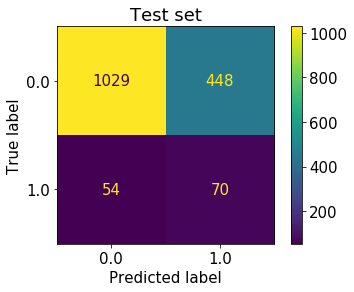

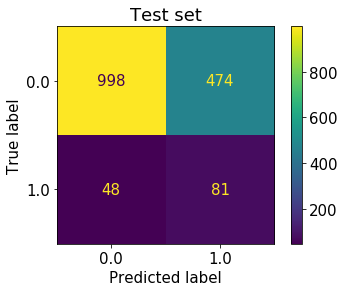

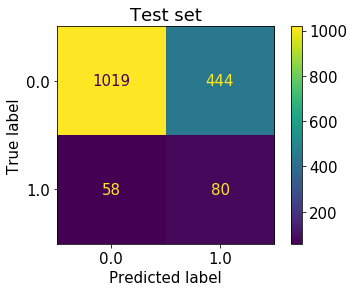

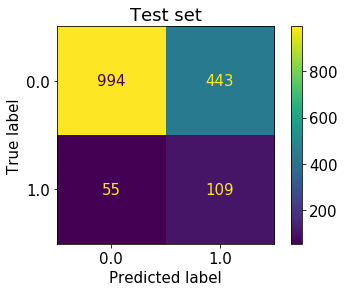

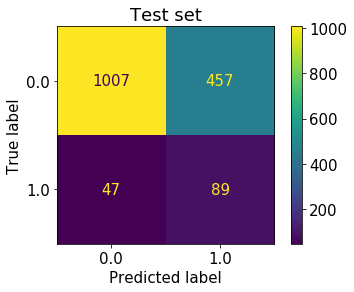

In [10]:
# instantiate and evaluate logistic regression model with balanced class weight

logreg = LogisticRegression(max_iter=10000, class_weight='balanced')

ut.k_fold_validator(X=X_training, y=y_training, classifier=logreg, cv=5)

### Model 3: Complement Naive Bayes model with continuous variables

Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.55


Train mean recall: 0.3 +/- 0.01
Train mean precision: 0.28 +/- 0.0
Train mean ROC-AUC: 0.61 +/- 0.0


Test mean recall: 0.3 +/- 0.01
Test mean precision: 0.27 +/- 0.02
Test mean ROC-AUC: 0.61 +/- 0.01


Feature weights: 
                  weight  abs_weight
yrs_emphysema   5.41350     5.41350
yrs_heart_fail  5.38400     5.38400
yrs_taking_ins  4.96720     4.96720
yrs_chron_bronc 4.68530     4.68530
yrs_heart_cond  3.95170     3.95170
yrs_osteoarth   3.58130     3.58130
yrs_diabetes    3.49430     3.49430
yrs_other_arth  3.48160     3.48160
yrs_asthma      3.29190     3.29190
ever_had_COPD   3.06700     3.06700
RIDAGEYR        0.24480     0.24480 

Confusion matrices for each fold test set: 



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


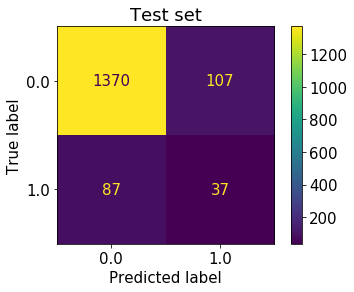

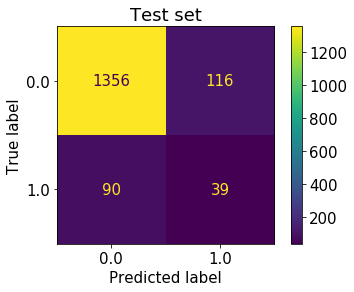

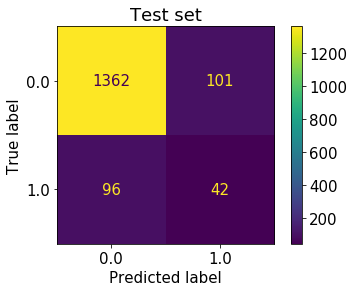

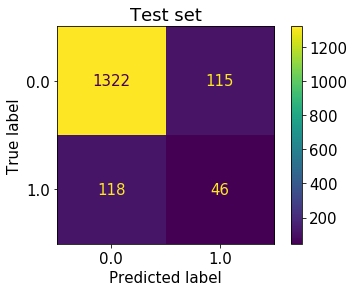

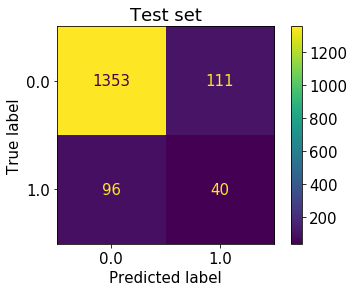

In [11]:
# try a complement Naive Bayes

CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)

### Model 4: Decision Tree with continuous variables

Classifier: DecisionTreeClassifier()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.49


Train mean recall: 0.55 +/- 0.01
Train mean precision: 1.0 +/- 0.0
Train mean ROC-AUC: 0.77 +/- 0.0


Test mean recall: 0.15 +/- 0.01
Test mean precision: 0.25 +/- 0.02
Test mean ROC-AUC: 0.55 +/- 0.01


Feature weights: 
                  weight  abs_weight
RIDAGEYR        0.28010     0.28010
yrs_heart_cond  0.14780     0.14780
yrs_diabetes    0.12320     0.12320
yrs_osteoarth   0.11190     0.11190
yrs_other_arth  0.10000     0.10000
yrs_asthma      0.08060     0.08060
yrs_heart_fail  0.05800     0.05800
yrs_taking_ins  0.04020     0.04020
yrs_emphysema   0.02250     0.02250
yrs_chron_bronc 0.01960     0.01960
ever_had_COPD   0.01610     0.01610 

Confusion matrices for each fold test set: 



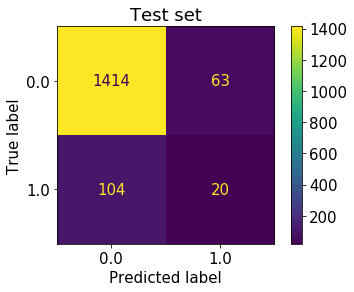

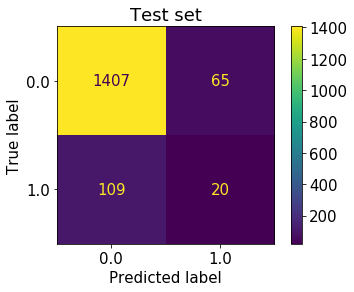

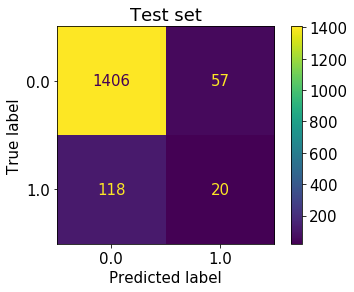

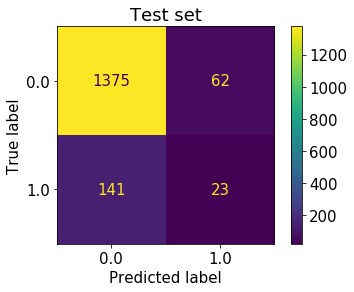

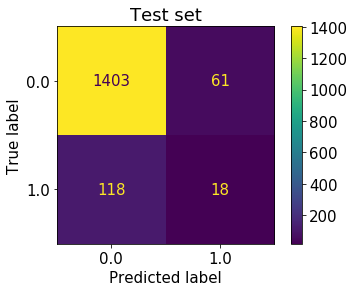

In [12]:
# try a decision tree

tree = DecisionTreeClassifier()

ut.k_fold_validator(X_training, y_training, tree)

### Model 5: Decision Tree with continuous variables and balanced class weight

Classifier: DecisionTreeClassifier(class_weight='balanced')
Cross-validation folds: 5


Mean ROC-AUC Score: 0.484


Train mean recall: 0.77 +/- 0.01
Train mean precision: 0.4 +/- 0.02
Train mean ROC-AUC: 0.83 +/- 0.0


Test mean recall: 0.25 +/- 0.03
Test mean precision: 0.13 +/- 0.02
Test mean ROC-AUC: 0.54 +/- 0.02


Feature weights: 
                  weight  abs_weight
RIDAGEYR        0.45990     0.45990
yrs_heart_cond  0.10550     0.10550
yrs_osteoarth   0.10060     0.10060
yrs_diabetes    0.08670     0.08670
yrs_asthma      0.08230     0.08230
yrs_other_arth  0.08010     0.08010
yrs_taking_ins  0.02290     0.02290
yrs_chron_bronc 0.01730     0.01730
ever_had_COPD   0.01620     0.01620
yrs_heart_fail  0.01580     0.01580
yrs_emphysema   0.01280     0.01280 

Confusion matrices for each fold test set: 



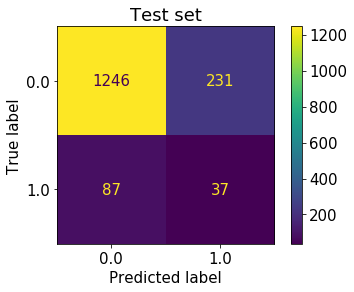

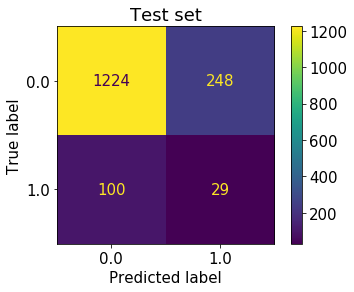

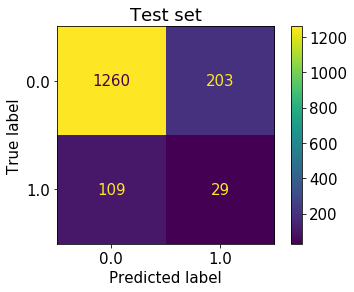

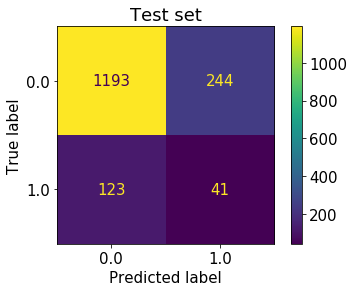

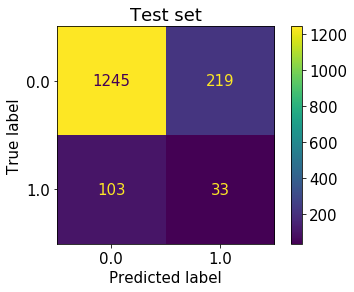

In [13]:
# try a decision tree with balanced class weight

tree = DecisionTreeClassifier(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, tree)

### Model 6: Pruned Decision Tree with continuous variables and balanced class weight

Classifier: DecisionTreeClassifier(class_weight='balanced', max_features=10,
                       min_samples_leaf=10, min_samples_split=10)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.64


Train mean recall: 0.72 +/- 0.02
Train mean precision: 0.24 +/- 0.02
Train mean ROC-AUC: 0.75 +/- 0.0


Test mean recall: 0.49 +/- 0.05
Test mean precision: 0.16 +/- 0.01
Test mean ROC-AUC: 0.62 +/- 0.02


Feature weights: 
                  weight  abs_weight
RIDAGEYR        0.59090     0.59090
yrs_heart_cond  0.14420     0.14420
yrs_osteoarth   0.06910     0.06910
yrs_other_arth  0.05810     0.05810
yrs_diabetes    0.05750     0.05750
yrs_asthma      0.04370     0.04370
ever_had_COPD   0.02180     0.02180
yrs_heart_fail  0.00940     0.00940
yrs_chron_bronc 0.00350     0.00350
yrs_emphysema   0.00180     0.00180
yrs_taking_ins  0.00000     0.00000 

Confusion matrices for each fold test set: 



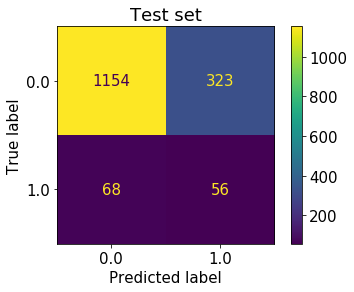

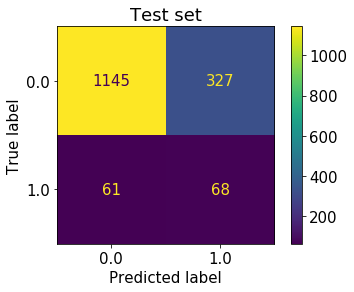

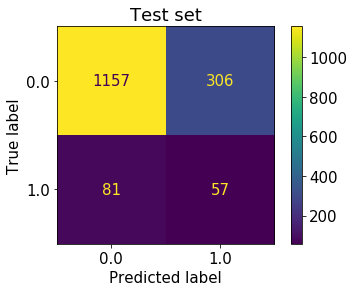

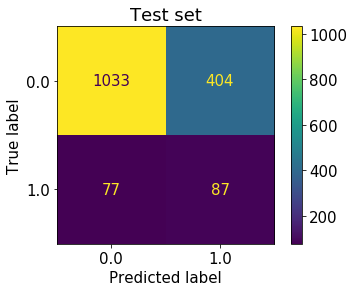

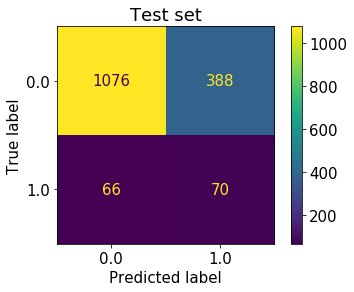

In [14]:
# try to prune the tree

tree = DecisionTreeClassifier(class_weight='balanced', max_features=10, min_samples_leaf=10, min_samples_split=10)

ut.k_fold_validator(X_training, y_training, tree)

### Model 7: Better Pruned Decision Tree with continuous variables and balanced class weight

Classifier: DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.719


Train mean recall: 0.6 +/- 0.06
Train mean precision: 0.21 +/- 0.03
Train mean ROC-AUC: 0.69 +/- 0.0


Test mean recall: 0.53 +/- 0.09
Test mean precision: 0.19 +/- 0.04
Test mean ROC-AUC: 0.66 +/- 0.02


Feature weights: 
                  weight  abs_weight
RIDAGEYR        0.63710     0.63710
yrs_heart_cond  0.21600     0.21600
yrs_osteoarth   0.07370     0.07370
ever_had_COPD   0.03580     0.03580
yrs_asthma      0.01710     0.01710
yrs_diabetes    0.01040     0.01040
yrs_taking_ins  0.00560     0.00560
yrs_heart_fail  0.00440     0.00440
yrs_other_arth  0.00000     0.00000
yrs_emphysema   0.00000     0.00000
yrs_chron_bronc 0.00000     0.00000 

Confusion matrices for each fold test set: 



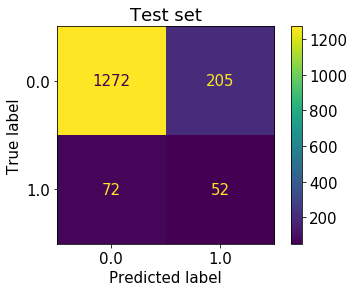

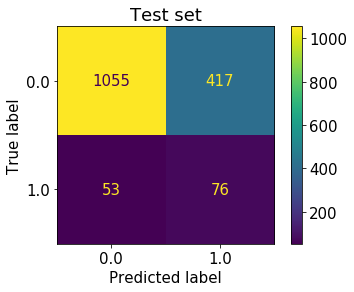

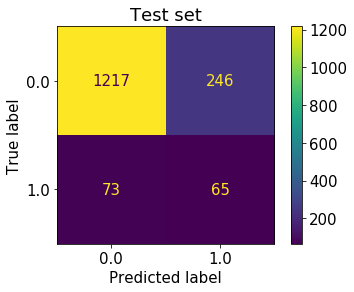

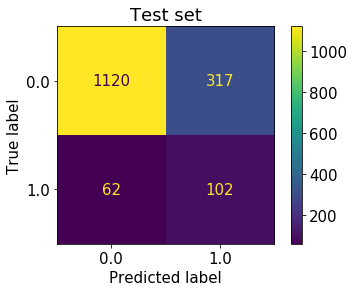

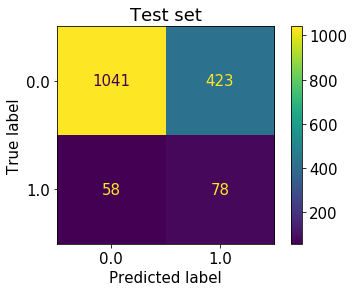

In [15]:
# kept increasing min_samples_split
# test recall plateaued at 300

tree = DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_split=300)

ut.k_fold_validator(X_training, y_training, tree)

### Model 8: Logistic Regression with binary variables and balanced class weight

In [16]:
binary_df = pd.read_csv('data/binary_df').set_index('SEQN')

In [17]:
# minority class is  8.5%, as above

binary_df['HUQ071'].value_counts(normalize=True)

0.00000   0.91455
1.00000   0.08545
Name: HUQ071, dtype: float64

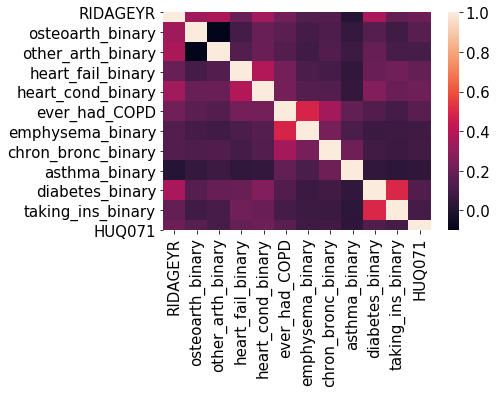

In [18]:
corr = binary_df.corr()
sns.heatmap(corr)

# no strong correlations
# even diabetes and taking insulin is only 50% correlated
# nothing is strongly correlated with hospitalization (HUQ071)

In [19]:
# define X and y

X = binary_df.drop(columns = 'HUQ071')
y = binary_df['HUQ071']

In [20]:
# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)

Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Mean ROC-AUC Score: 0.729


Train mean recall: 0.61 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.68 +/- 0.0


Test mean recall: 0.6 +/- 0.02
Test mean precision: 0.18 +/- 0.02
Test mean ROC-AUC: 0.67 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           1.26170     1.26170
heart_cond_binary  0.89160     0.89160
heart_fail_binary  0.86460     0.86460
osteoarth_binary   0.75930     0.75930
ever_had_COPD      0.53660     0.53660
other_arth_binary  0.32840     0.32840
asthma_binary      0.18080     0.18080
emphysema_binary   0.14910     0.14910
diabetes_binary    0.14540     0.14540
chron_bronc_binary 0.12450     0.12450
taking_ins_binary  0.12410     0.12410 

Confusion matrices for each fold test set: 



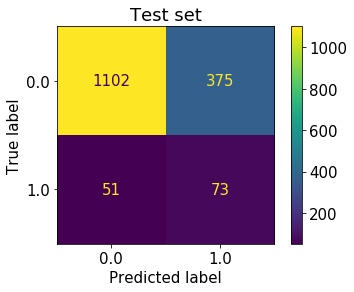

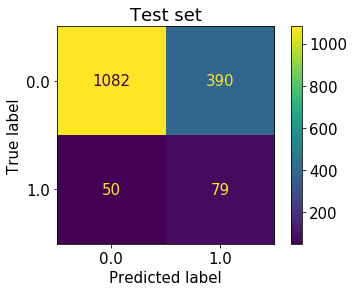

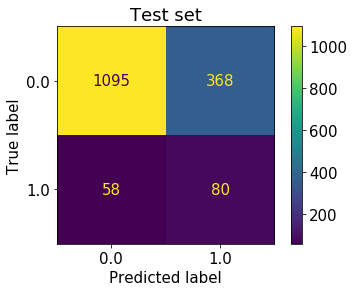

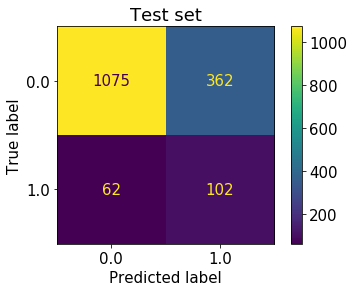

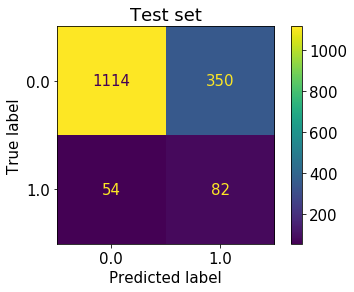

In [21]:
# try a Logistic Regression with balanced class weight

logreg = LogisticRegression(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, logreg)

### Model 10: Complement Naive Bayes model with binary variables

Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.604


Train mean recall: 0.41 +/- 0.02
Train mean precision: 0.26 +/- 0.02
Train mean ROC-AUC: 0.65 +/- 0.0


Test mean recall: 0.41 +/- 0.05
Test mean precision: 0.26 +/- 0.03
Test mean ROC-AUC: 0.65 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   4.66390     4.66390
heart_fail_binary  4.21200     4.21200
chron_bronc_binary 4.05590     4.05590
taking_ins_binary  3.69590     3.69590
ever_had_COPD      3.56530     3.56530
heart_cond_binary  2.81920     2.81920
osteoarth_binary   2.62620     2.62620
asthma_binary      2.36340     2.36340
diabetes_binary    2.33120     2.33120
other_arth_binary  2.24040     2.24040
RIDAGEYR           0.74310     0.74310 

Confusion matrices for each fold test set: 



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


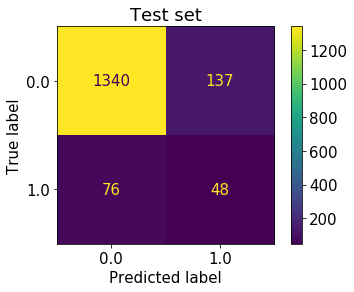

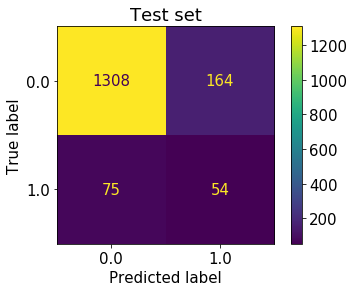

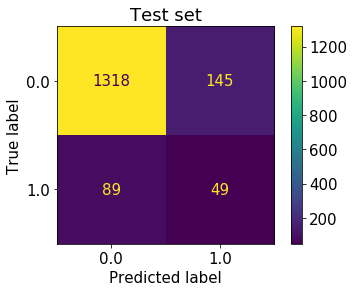

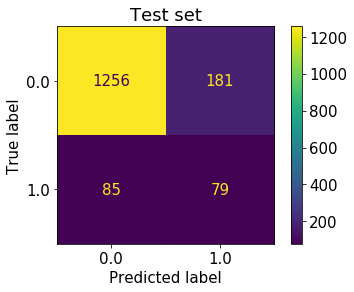

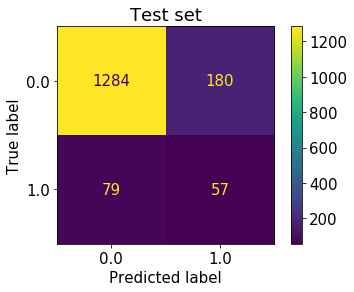

In [22]:
# try a complement naive Bayes

CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)

### Model 11: Decision Tree with binary variables and balanced class weight

Classifier: DecisionTreeClassifier(class_weight='balanced')
Cross-validation folds: 5


Mean ROC-AUC Score: 0.506


Train mean recall: 0.77 +/- 0.01
Train mean precision: 0.28 +/- 0.01
Train mean ROC-AUC: 0.79 +/- 0.0


Test mean recall: 0.35 +/- 0.03
Test mean precision: 0.13 +/- 0.01
Test mean ROC-AUC: 0.57 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.62130     0.62130
heart_cond_binary  0.09230     0.09230
diabetes_binary    0.05550     0.05550
asthma_binary      0.05230     0.05230
osteoarth_binary   0.04230     0.04230
taking_ins_binary  0.02910     0.02910
other_arth_binary  0.02790     0.02790
ever_had_COPD      0.02670     0.02670
chron_bronc_binary 0.02110     0.02110
emphysema_binary   0.01830     0.01830
heart_fail_binary  0.01310     0.01310 

Confusion matrices for each fold test set: 



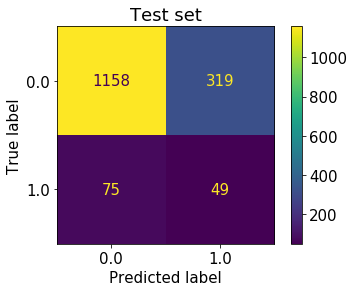

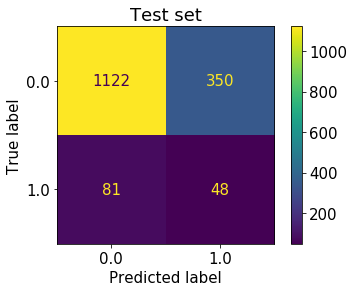

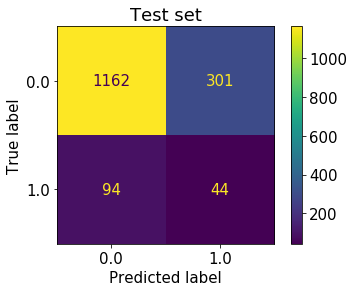

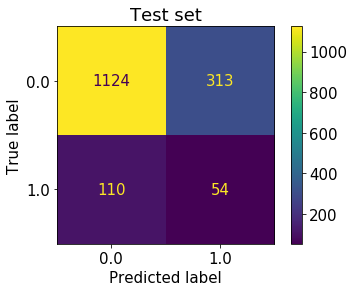

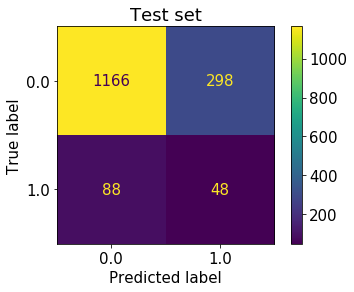

In [23]:
tree = DecisionTreeClassifier(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, tree)

### Model 13: Pruned Decision Tree with binary variables and balanced class weight

Classifier: DecisionTreeClassifier(class_weight='balanced', max_features=10,
                       min_samples_leaf=10, min_samples_split=8)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.665


Train mean recall: 0.72 +/- 0.02
Train mean precision: 0.21 +/- 0.01
Train mean ROC-AUC: 0.73 +/- 0.0


Test mean recall: 0.57 +/- 0.05
Test mean precision: 0.16 +/- 0.01
Test mean ROC-AUC: 0.65 +/- 0.02


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.66230     0.66230
heart_cond_binary  0.13980     0.13980
osteoarth_binary   0.06010     0.06010
ever_had_COPD      0.04400     0.04400
other_arth_binary  0.03090     0.03090
diabetes_binary    0.02810     0.02810
asthma_binary      0.02600     0.02600
heart_fail_binary  0.00410     0.00410
chron_bronc_binary 0.00380     0.00380
taking_ins_binary  0.00080     0.00080
emphysema_binary   0.00000     0.00000 

Confusion matrices for each fold test set: 



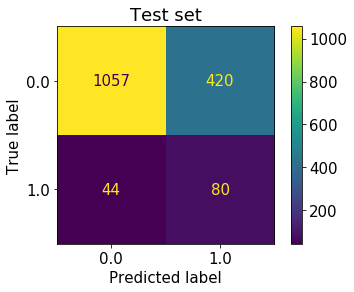

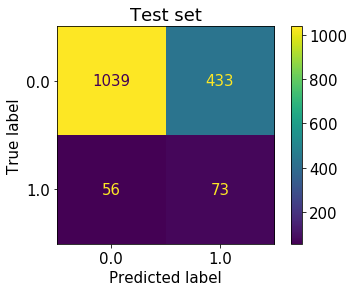

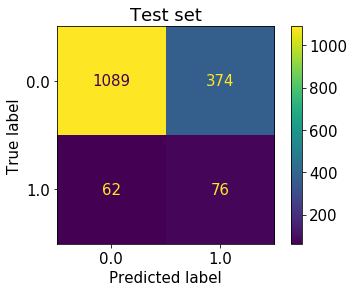

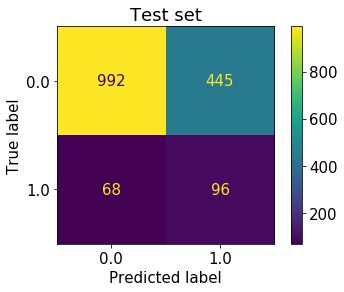

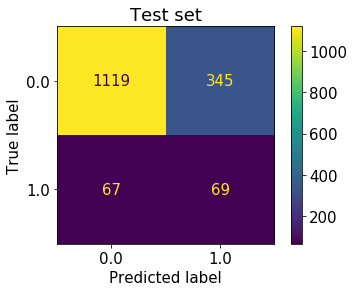

In [24]:
# try a decision tree

tree = DecisionTreeClassifier(class_weight='balanced', 
                              max_features=10,
                              min_samples_leaf=10, 
                              min_samples_split=8)

ut.k_fold_validator(X_training, y_training, tree)

### Model 14: More pruned Decision Tree with binary variables

Classifier: DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.728


Train mean recall: 0.62 +/- 0.07
Train mean precision: 0.2 +/- 0.03
Train mean ROC-AUC: 0.69 +/- 0.0


Test mean recall: 0.58 +/- 0.07
Test mean precision: 0.19 +/- 0.04
Test mean ROC-AUC: 0.67 +/- 0.02


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.67810     0.67810
heart_cond_binary  0.20400     0.20400
osteoarth_binary   0.05420     0.05420
ever_had_COPD      0.03910     0.03910
asthma_binary      0.01320     0.01320
taking_ins_binary  0.00690     0.00690
heart_fail_binary  0.00460     0.00460
other_arth_binary  0.00000     0.00000
emphysema_binary   0.00000     0.00000
chron_bronc_binary 0.00000     0.00000
diabetes_binary    0.00000     0.00000 

Confusion matrices for each fold test set: 



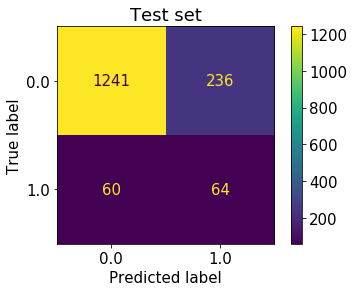

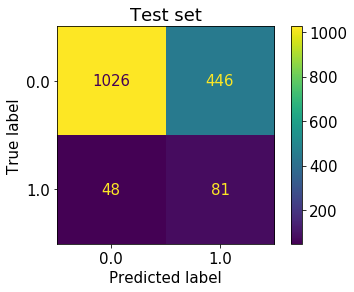

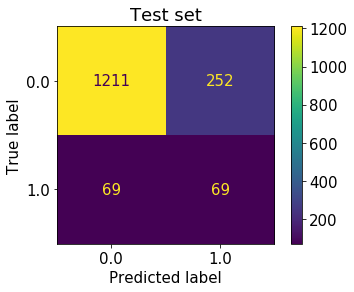

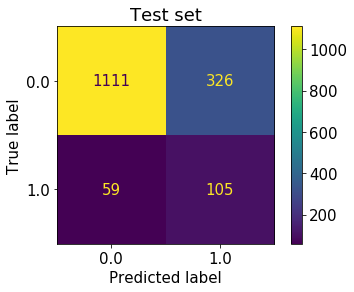

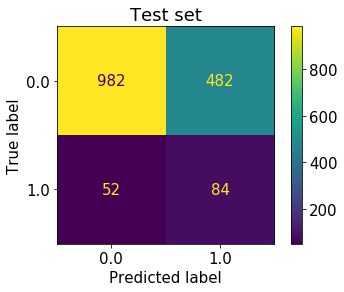

In [25]:
# try a decision tree

tree = DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_split=300)

ut.k_fold_validator(X_training, y_training, tree)

### Model 14: Random Forest Classifier with binary variables

In [26]:
forest = RandomForestClassifier(n_estimators=100, 
                                criterion='gini', 
                                max_depth=6, 
                                min_samples_split=300,
                                class_weight='balanced')



Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.743


Train mean recall: 0.63 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.69 +/- 0.0


Test mean recall: 0.62 +/- 0.02
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.68 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.44310     0.44310
heart_cond_binary  0.21390     0.21390
osteoarth_binary   0.11930     0.11930
heart_fail_binary  0.05840     0.05840
ever_had_COPD      0.05390     0.05390
diabetes_binary    0.04170     0.04170
other_arth_binary  0.03640     0.03640
asthma_binary      0.01220     0.01220
taking_ins_binary  0.00770     0.00770
chron_bronc_binary 0.00680     0.00680
emphysema_binary   0.00660     0.00660 

Confusion matrices for each fold test set: 



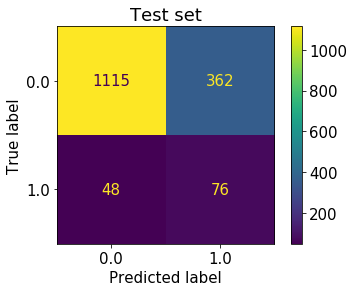

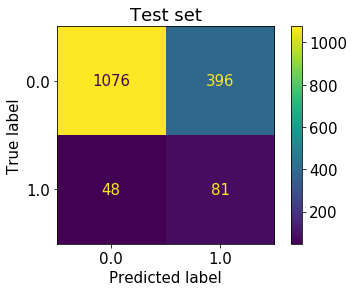

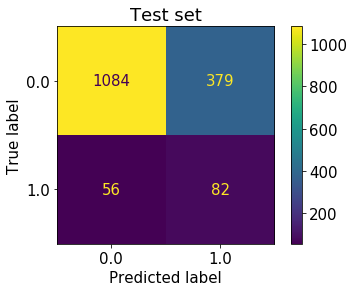

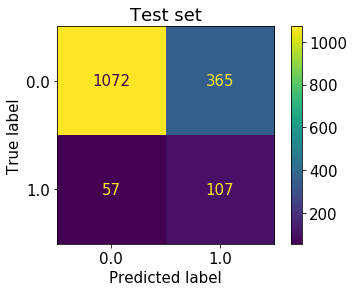

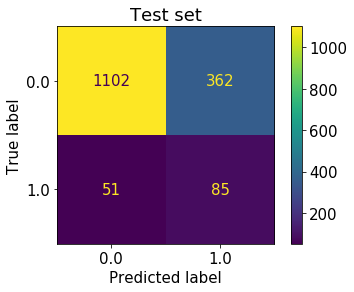

In [27]:
ut.k_fold_validator(X_training, y_training, forest, cv=5)

### Model 8: Logistic Regression with binary variables, balanced class weight, updated hospitalizations

In [28]:
# try with updated non-birth hospitalizations

binary_df_2 = pd.read_csv('data/binary_df_2').set_index('SEQN')
binary_df_2

RIDAGEYR  osteoarth_binary  other_arth_binary  \
SEQN                                                          
93703.00000    2.00000           0.00000            0.00000   
93704.00000    2.00000           0.00000            0.00000   
93705.00000   66.00000           0.00000            1.00000   
93706.00000   18.00000           0.00000            0.00000   
93707.00000   13.00000           0.00000            0.00000   
...                ...               ...                ...   
102952.00000  70.00000           0.00000            0.00000   
102953.00000  42.00000           0.00000            0.00000   
102954.00000  41.00000           0.00000            0.00000   
102955.00000  14.00000           0.00000            0.00000   
102956.00000  38.00000           1.00000            0.00000   

              heart_fail_binary  heart_cond_binary  ever_had_COPD  \
SEQN                                                                
93703.00000             0.00000            0.00000        0.00000   
93704.00000             0.00000            0.00000        0.00000   
93705.00000             0.00000            0.00000        0.00000   
93706.00000             0.00000            0.00000        0.00000   
93707.00000             0.00000            0.00000        0.00000   
...                         ...                ...            ...   
102952.00000            0.00000            0.00000        0.00000   
102953.00000            0.00000            0.00000        0.00000   
102954.00000            0.00000            0.00000        0.00000   
102955.00000            0.00000            0.00000        0.00000   
102956.00000            0.00000            0.00000        0.00000   

              emphysema_binary  chron_bronc_binary  asthma_binary  \
SEQN                                                                
93703.00000            0.00000             0.00000        0.00000   
93704.00000            0.00000             0.00000        0.00000   
93705.00000            0.00000             0.00000        0.00000   
93706.00000            0.00000             0.00000        0.00000   
93707.00000            0.00000             0.00000        0.00000   
...                        ...                 ...            ...   
102952.00000           0.00000             0.00000        0.00000   
102953.00000           0.00000             0.00000        0.00000   
102954.00000           0.00000             0.00000        0.00000   
102955.00000           0.00000             0.00000        0.00000   
102956.00000           0.00000             0.00000        0.00000   

              diabetes_binary  taking_ins_binary  updated_hosp  
SEQN                                                            
93703.00000           0.00000            0.00000       0.00000  
93704.00000           0.00000            0.00000       0.00000  
93705.00000           0.00000            0.00000       0.00000  
93706.00000           0.00000            0.00000       0.00000  
93707.00000           0.00000            0.00000       0.00000  
...                       ...                ...           ...  
102952.00000          0.00000            0.00000       0.00000  
102953.00000          0.00000            0.00000       0.00000  
102954.00000          0.00000            0.00000       0.00000  
102955.00000          0.00000            0.00000       0.00000  
102956.00000          0.00000            0.00000       0.00000  

[8894 rows x 12 columns]

In [29]:
# define X and y

X = binary_df_2.drop(columns = 'updated_hosp')
y = binary_df_2['updated_hosp']

In [30]:
# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)

Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Mean ROC-AUC Score: 0.745


Train mean recall: 0.64 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.7 +/- 0.0


Test mean recall: 0.63 +/- 0.02
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.7 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           1.36560     1.36560
heart_cond_binary  0.94720     0.94720
heart_fail_binary  0.88350     0.88350
osteoarth_binary   0.84930     0.84930
ever_had_COPD      0.49940     0.49940
other_arth_binary  0.42070     0.42070
emphysema_binary   0.20890     0.20890
chron_bronc_binary 0.17320     0.17320
diabetes_binary    0.16950     0.16950
asthma_binary      0.14650     0.14650
taking_ins_binary  0.14370     0.14370 

Confusion matrices for each fold test set: 



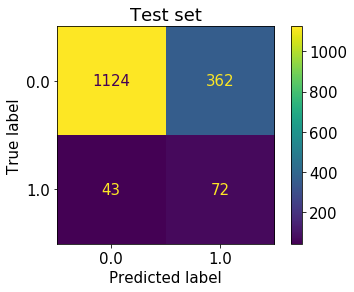

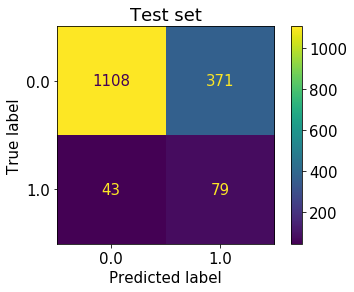

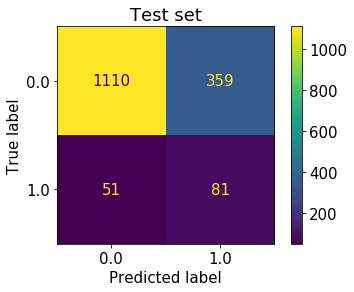

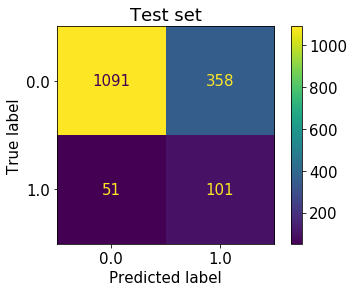

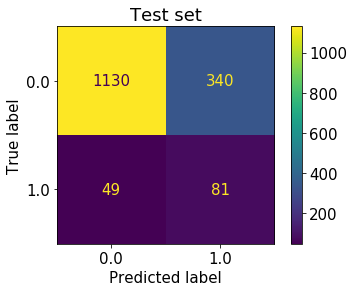

In [31]:
# try a Logistic Regression with balanced class weight

logreg = LogisticRegression(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, logreg)

### Model 9: Complement Naive Bayes model with binary variables and updated target

Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.618


Train mean recall: 0.44 +/- 0.01
Train mean precision: 0.26 +/- 0.02
Train mean ROC-AUC: 0.66 +/- 0.0


Test mean recall: 0.44 +/- 0.06
Test mean precision: 0.26 +/- 0.03
Test mean ROC-AUC: 0.66 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   4.66730     4.66730
heart_fail_binary  4.21540     4.21540
chron_bronc_binary 4.05940     4.05940
taking_ins_binary  3.69930     3.69930
ever_had_COPD      3.56190     3.56190
heart_cond_binary  2.82260     2.82260
osteoarth_binary   2.62960     2.62960
asthma_binary      2.35870     2.35870
diabetes_binary    2.33260     2.33260
other_arth_binary  2.24380     2.24380
RIDAGEYR           0.74180     0.74180 

Confusion matrices for each fold test set: 



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


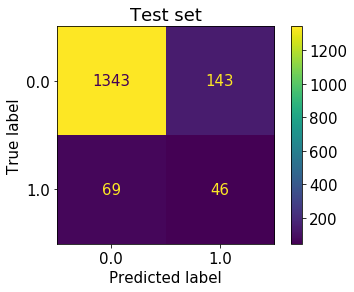

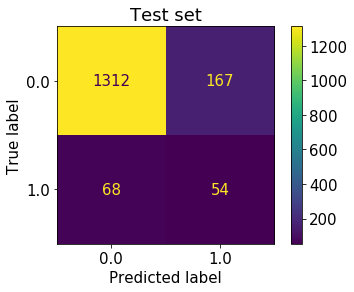

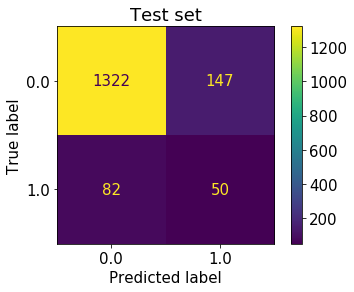

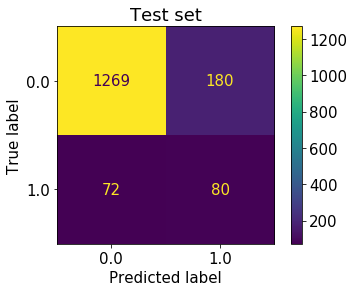

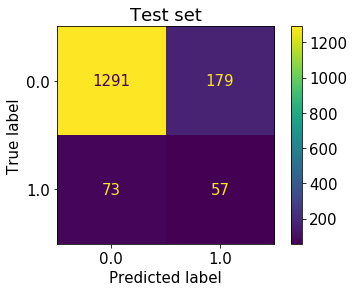

In [32]:
# try a complement naive Bayes

CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)

### Random Forest with binary variables and updated target

Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.752


Train mean recall: 0.65 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.0


Test mean recall: 0.64 +/- 0.03
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.7 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.43280     0.43280
heart_cond_binary  0.22220     0.22220
osteoarth_binary   0.14500     0.14500
heart_fail_binary  0.04910     0.04910
ever_had_COPD      0.04100     0.04100
diabetes_binary    0.04070     0.04070
other_arth_binary  0.03870     0.03870
taking_ins_binary  0.01000     0.01000
asthma_binary      0.00980     0.00980
chron_bronc_binary 0.00610     0.00610
emphysema_binary   0.00470     0.00470 

Confusion matrices for each fold test set: 



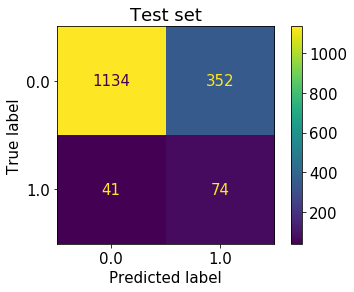

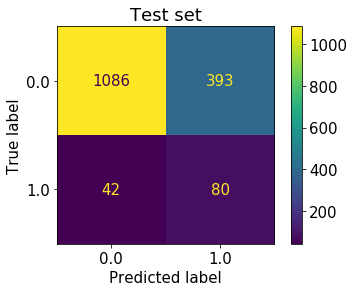

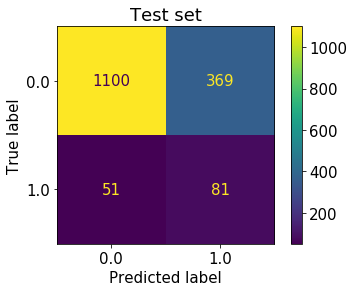

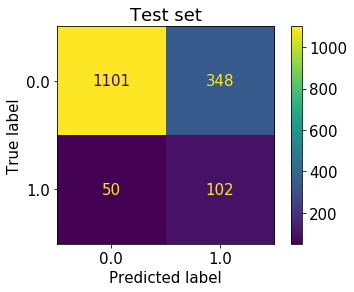

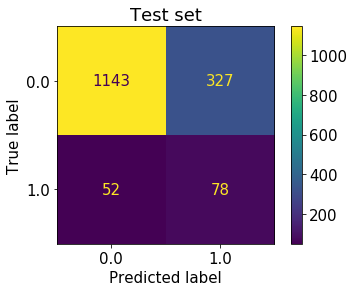

In [33]:
ut.k_fold_validator(X_training, y_training, forest, cv=5)

In [34]:
tree = DecisionTreeClassifier(class_weight='balanced',
                              max_features=7,
                              min_samples_leaf=200,
                            max_depth=2,
                            min_samples_split=1000,
                             max_leaf_nodes=25,
                             criterion='entropy')

In [35]:
Ada = AdaBoostClassifier(base_estimator=tree, n_estimators=100)

Classifier: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         max_features=7,
                                                         max_leaf_nodes=25,
                                                         min_samples_leaf=200,
                                                         min_samples_split=1000),
                   n_estimators=100)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.738


Train mean recall: 0.66 +/- 0.02
Train mean precision: 0.2 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.01


Test mean recall: 0.62 +/- 0.03
Test mean precision: 0.19 +/- 0.01
Test mean ROC-AUC: 0.69 +/- 0.02




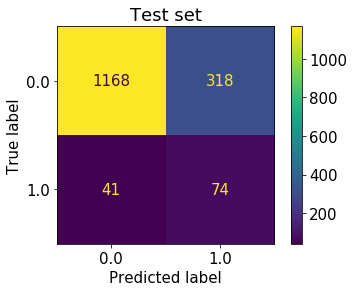

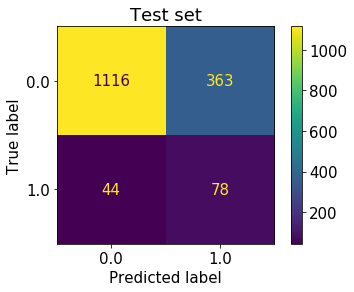

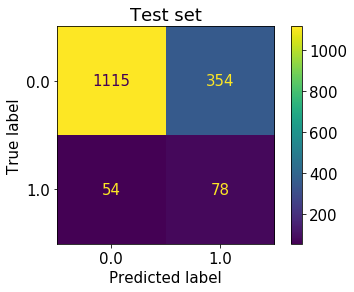

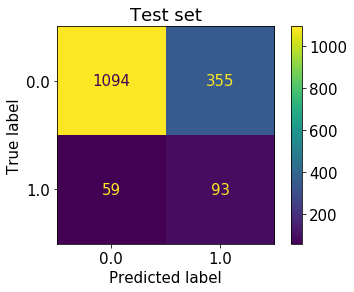

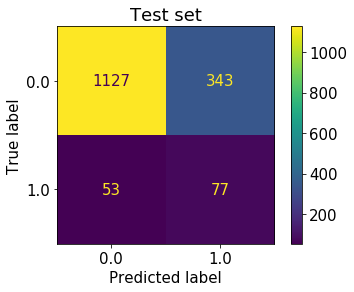

In [36]:
ut.k_fold_validator(X_training, y_training, Ada, cv=5)

### Gradient-boosted tree with binary variables, updated hosp

In [37]:
XGB = XGBClassifier(n_estimators=100,
                    class_weight='balanced',
                              max_features=7,
                              min_samples_leaf=100,
                            max_depth=2,
                            min_samples_split=1000,
                             max_leaf_nodes=25,
                             criterion='entropy')


In [38]:
XGB = XGBClassifier(n_estimators=100, 
                                criterion='entropy', 
                                max_depth=2, 
                                min_samples_split=1000,
                                class_weight='balanced')

Classifier: XGBClassifier(class_weight='balanced', criterion='entropy', max_depth=2,
              min_samples_split=1000)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.75


Train mean recall: 0.05 +/- 0.01
Train mean precision: 0.63 +/- 0.05
Train mean ROC-AUC: 0.52 +/- 0.01


Test mean recall: 0.03 +/- 0.0
Test mean precision: 0.5 +/- 0.05
Test mean ROC-AUC: 0.51 +/- 0.0




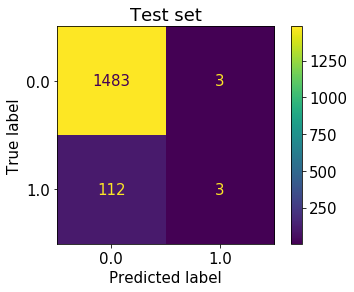

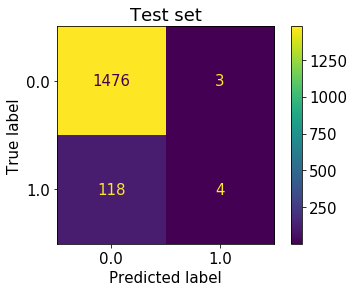

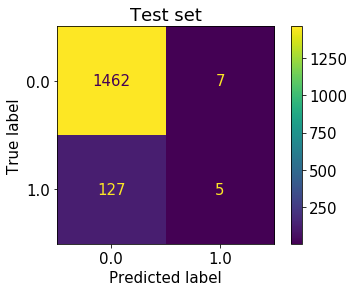

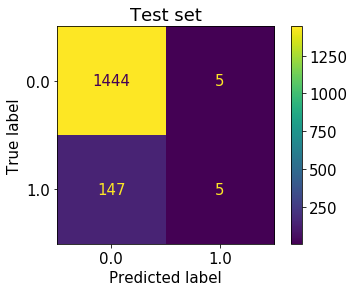

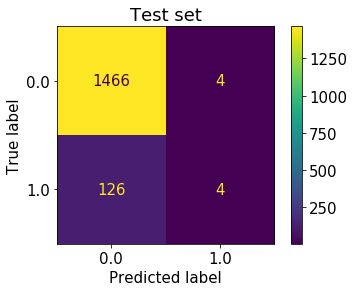

In [39]:
ut.k_fold_validator(X_training, y_training, XGB, cv=5)

In [40]:
# add race

binary_df_3 = pd.read_csv('data/binary_df_3').set_index('SEQN')
binary_df_3.head(200)

RIDAGEYR  osteoarth_binary  other_arth_binary  heart_fail_binary  \
SEQN                                                                            
93703.00000   2.00000           0.00000            0.00000            0.00000   
93704.00000   2.00000           0.00000            0.00000            0.00000   
93705.00000  66.00000           0.00000            1.00000            0.00000   
93706.00000  18.00000           0.00000            0.00000            0.00000   
93707.00000  13.00000           0.00000            0.00000            0.00000   
93708.00000  66.00000           0.00000            0.00000            0.00000   
93709.00000  75.00000           0.00000            1.00000            0.00000   
93711.00000  56.00000           0.00000            0.00000            0.00000   
93712.00000  18.00000           0.00000            0.00000            0.00000   
93713.00000  67.00000           0.00000            1.00000            0.00000   
93714.00000  54.00000           0.00000            0.00000            0.00000   
93715.00000  71.00000           1.00000            0.00000            0.00000   
93716.00000  61.00000           0.00000            1.00000            0.00000   
93717.00000  22.00000           0.00000            0.00000            0.00000   
93718.00000  45.00000           0.00000            0.00000            0.00000   
93719.00000  13.00000           0.00000            0.00000            0.00000   
93720.00000   1.00000           0.00000            0.00000            0.00000   
93721.00000  60.00000           0.00000            0.00000            0.00000   
93722.00000  60.00000           0.00000            0.00000            0.00000   
93723.00000  64.00000           1.00000            0.00000            0.00000   
93724.00000   5.00000           0.00000            0.00000            0.00000   
93725.00000   9.00000           0.00000            0.00000            0.00000   
93726.00000  67.00000           0.00000            0.00000            0.00000   
93727.00000  70.00000           0.00000            0.00000            0.00000   
93728.00000  53.00000           0.00000            0.00000            0.00000   
93729.00000  42.00000           0.00000            0.00000            0.00000   
93730.00000  57.00000           0.00000            0.00000            0.00000   
93731.00000  20.00000           0.00000            0.00000            0.00000   
93732.00000  72.00000           0.00000            0.00000            0.00000   
93733.00000  11.00000           0.00000            0.00000            0.00000   
93734.00000  13.00000           0.00000            0.00000            0.00000   
93735.00000  52.00000           0.00000            0.00000            0.00000   
93736.00000  11.00000           0.00000            0.00000            0.00000   
93737.00000   8.00000           0.00000            0.00000            0.00000   
93738.00000  26.00000           0.00000            0.00000            0.00000   
93739.00000   5.00000           0.00000            0.00000            0.00000   
93740.00000  72.00000           0.00000            1.00000            1.00000   
93741.00000   9.00000           0.00000            0.00000            0.00000   
93742.00000  72.00000           1.00000            0.00000            0.00000   
93743.00000  61.00000           0.00000            1.00000            0.00000   
93744.00000  10.00000           0.00000            0.00000            0.00000   
93745.00000   5.00000           0.00000            0.00000            0.00000   
93746.00000  25.00000           0.00000            0.00000            0.00000   
93747.00000  13.00000           0.00000            0.00000            0.00000   
93749.00000   1.00000           0.00000            0.00000            0.00000   
93750.00000  52.00000           0.00000            0.00000            0.00000   
93751.00000   7.00000           0.00000            0.00000            0.00000   
93752.00000  73.00000           0.00000     

In [41]:
# define X and y

X = binary_df_3.drop(columns = 'updated_hosp')
y = binary_df_3['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)


Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.755


Train mean recall: 0.65 +/- 0.02
Train mean precision: 0.2 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.0


Test mean recall: 0.64 +/- 0.03
Test mean precision: 0.19 +/- 0.03
Test mean ROC-AUC: 0.7 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.36080     0.36080
heart_cond_binary  0.22280     0.22280
osteoarth_binary   0.13970     0.13970
heart_fail_binary  0.06400     0.06400
ever_had_COPD      0.05680     0.05680
other_arth_binary  0.04890     0.04890
diabetes_binary    0.04500     0.04500
RIDRETH3_6.0       0.01150     0.01150
RIDRETH3_3.0       0.01100     0.01100
taking_ins_binary  0.01080     0.01080
emphysema_binary   0.00690     0.00690
chron_bronc_binary 0.00690     0.00690
asthma_binary      0.00590     0.00590
RIDRETH3_2.0       0.00420     0.00420
RIDRETH3_1.0     

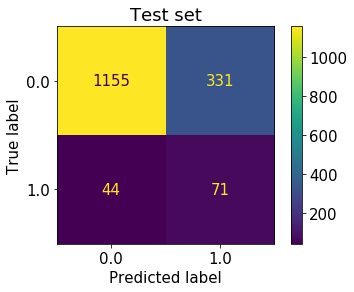

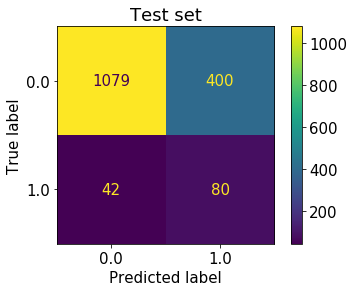

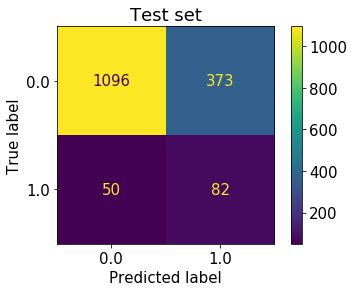

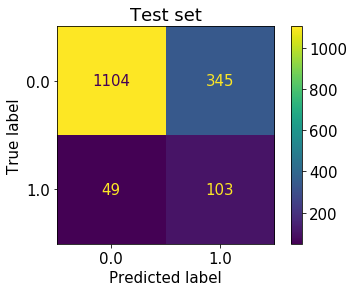

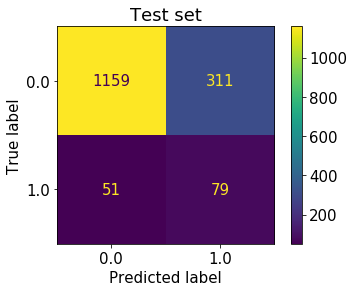

In [42]:
ut.k_fold_validator(X_training, y_training, forest, cv=5)

Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.716


Train mean recall: 0.52 +/- 0.02
Train mean precision: 0.23 +/- 0.01
Train mean ROC-AUC: 0.68 +/- 0.01


Test mean recall: 0.52 +/- 0.04
Test mean precision: 0.23 +/- 0.03
Test mean ROC-AUC: 0.68 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.38700     5.38700
heart_fail_binary  4.93500     4.93500
chron_bronc_binary 4.77900     4.77900
taking_ins_binary  4.41900     4.41900
ever_had_COPD      4.28160     4.28160
heart_cond_binary  3.54220     3.54220
osteoarth_binary   3.34920     3.34920
asthma_binary      3.07830     3.07830
diabetes_binary    3.05220     3.05220
RIDRETH3_2.0       3.04830     3.04830
other_arth_binary  2.96340     2.96340
RIDRETH3_6.0       2.58670     2.58670
RIDRETH3_1.0       2.48310     2.48310
RIDRETH3_4.0       2.06210     2.06210
RIDRETH3_3.0       1.71660     1.71660
RIDAGEYR           1.46140     1.46140 

Confusion matrices for eac

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


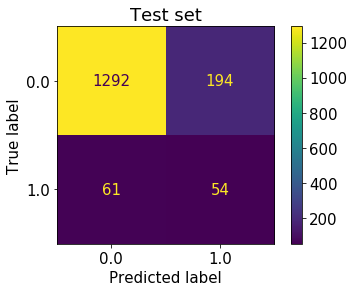

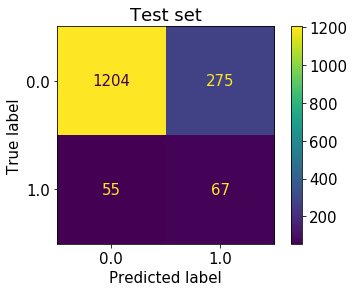

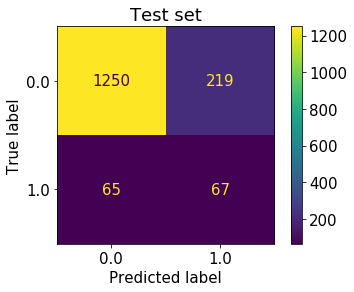

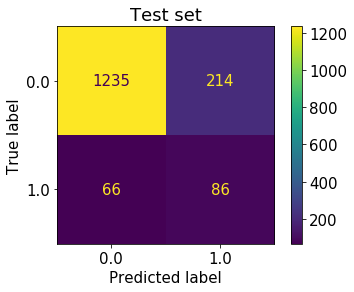

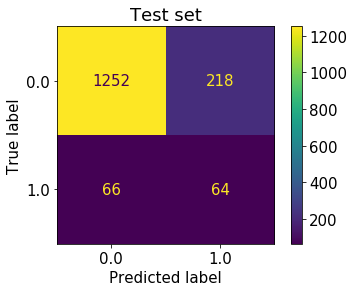

In [43]:
CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)

Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Mean ROC-AUC Score: 0.748


Train mean recall: 0.64 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.7 +/- 0.0


Test mean recall: 0.63 +/- 0.02
Test mean precision: 0.18 +/- 0.02
Test mean ROC-AUC: 0.69 +/- 0.01


Feature weights: 
                      weight  abs_weight
RIDAGEYR            1.38060     1.38060
heart_cond_binary   0.92210     0.92210
heart_fail_binary   0.87970     0.87970
osteoarth_binary    0.79520     0.79520
RIDRETH3_6.0       -0.54090     0.54090
ever_had_COPD       0.47650     0.47650
other_arth_binary   0.38430     0.38430
RIDRETH3_1.0       -0.24290     0.24290
diabetes_binary     0.20810     0.20810
RIDRETH3_4.0       -0.19290     0.19290
emphysema_binary    0.17820     0.17820
taking_ins_binary   0.15780     0.15780
asthma_binary       0.14180     0.14180
chron_bronc_binary  0.12420     0.12420
RIDRETH3_2.0        0.10560     0.10560
RIDRETH3_3.0       -0.06

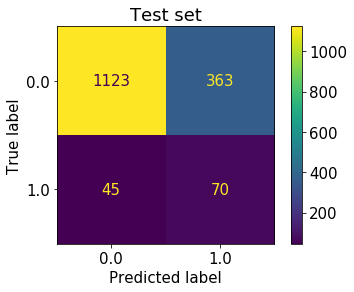

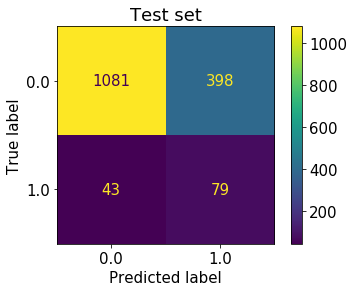

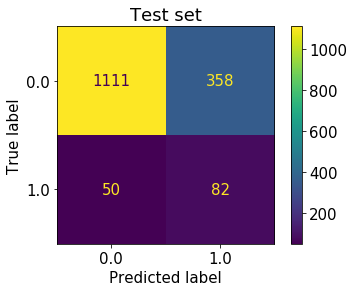

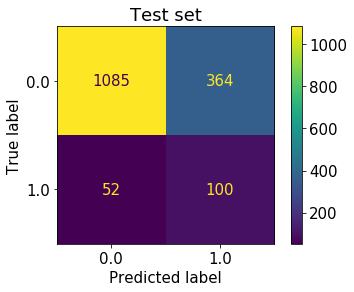

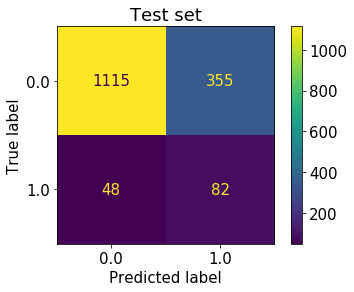

In [44]:
logreg = LogisticRegression(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, logreg)

In [45]:
# add number of prescriptions per patient

binary_df_4 = pd.read_csv('data/binary_df_4').set_index('SEQN')
binary_df_4.head(200)

RIDAGEYR  osteoarth_binary  other_arth_binary  heart_fail_binary  \
SEQN                                                                            
93703.00000   2.00000           0.00000            0.00000            0.00000   
93704.00000   2.00000           0.00000            0.00000            0.00000   
93705.00000  66.00000           0.00000            1.00000            0.00000   
93706.00000  18.00000           0.00000            0.00000            0.00000   
93707.00000  13.00000           0.00000            0.00000            0.00000   
93708.00000  66.00000           0.00000            0.00000            0.00000   
93709.00000  75.00000           0.00000            1.00000            0.00000   
93711.00000  56.00000           0.00000            0.00000            0.00000   
93712.00000  18.00000           0.00000            0.00000            0.00000   
93713.00000  67.00000           0.00000            1.00000            0.00000   
93714.00000  54.00000           0.00000            0.00000            0.00000   
93715.00000  71.00000           1.00000            0.00000            0.00000   
93716.00000  61.00000           0.00000            1.00000            0.00000   
93717.00000  22.00000           0.00000            0.00000            0.00000   
93718.00000  45.00000           0.00000            0.00000            0.00000   
93719.00000  13.00000           0.00000            0.00000            0.00000   
93720.00000   1.00000           0.00000            0.00000            0.00000   
93721.00000  60.00000           0.00000            0.00000            0.00000   
93722.00000  60.00000           0.00000            0.00000            0.00000   
93723.00000  64.00000           1.00000            0.00000            0.00000   
93724.00000   5.00000           0.00000            0.00000            0.00000   
93725.00000   9.00000           0.00000            0.00000            0.00000   
93726.00000  67.00000           0.00000            0.00000            0.00000   
93727.00000  70.00000           0.00000            0.00000            0.00000   
93728.00000  53.00000           0.00000            0.00000            0.00000   
93729.00000  42.00000           0.00000            0.00000            0.00000   
93730.00000  57.00000           0.00000            0.00000            0.00000   
93731.00000  20.00000           0.00000            0.00000            0.00000   
93732.00000  72.00000           0.00000            0.00000            0.00000   
93733.00000  11.00000           0.00000            0.00000            0.00000   
93734.00000  13.00000           0.00000            0.00000            0.00000   
93735.00000  52.00000           0.00000            0.00000            0.00000   
93736.00000  11.00000           0.00000            0.00000            0.00000   
93737.00000   8.00000           0.00000            0.00000            0.00000   
93738.00000  26.00000           0.00000            0.00000            0.00000   
93739.00000   5.00000           0.00000            0.00000            0.00000   
93740.00000  72.00000           0.00000            1.00000            1.00000   
93741.00000   9.00000           0.00000            0.00000            0.00000   
93742.00000  72.00000           1.00000            0.00000            0.00000   
93743.00000  61.00000           0.00000            1.00000            0.00000   
93744.00000  10.00000           0.00000            0.00000            0.00000   
93745.00000   5.00000           0.00000            0.00000            0.00000   
93746.00000  25.00000           0.00000            0.00000            0.00000   
93747.00000  13.00000           0.00000            0.00000            0.00000   
93749.00000   1.00000           0.00000            0.00000            0.00000   
93750.00000  52.00000           0.00000            0.00000            0.00000   
93751.00000   7.00000           0.00000            0.00000            0.00000   
93752.00000  73.00000           0.00000     

In [46]:
# define X and y

X = binary_df_4.drop(columns = ['updated_hosp'])
y = binary_df_4['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)


Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.762


Train mean recall: 0.69 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.66 +/- 0.02
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.7 +/- 0.01


Feature weights: 
                     weight  abs_weight
num_rx             0.32020     0.32020
RIDAGEYR           0.27460     0.27460
heart_cond_binary  0.16070     0.16070
osteoarth_binary   0.08340     0.08340
ever_had_COPD      0.03020     0.03020
heart_fail_binary  0.02970     0.02970
other_arth_binary  0.02570     0.02570
diabetes_binary    0.02530     0.02530
RIDRETH3_6.0       0.01190     0.01190
RIDRETH3_2.0       0.00740     0.00740
chron_bronc_binary 0.00600     0.00600
emphysema_binary   0.00540     0.00540
asthma_binary      0.00520     0.00520
RIDRETH3_3.0       0.00500     0.00500
RIDRETH3_1.0    

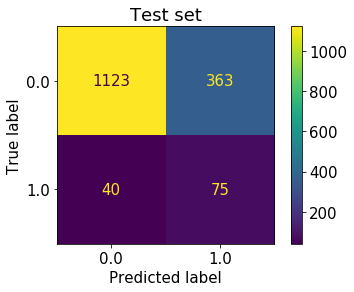

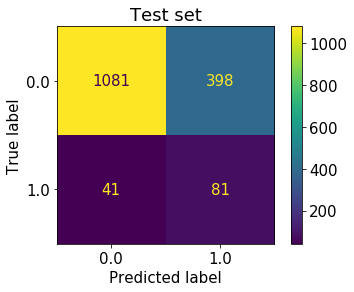

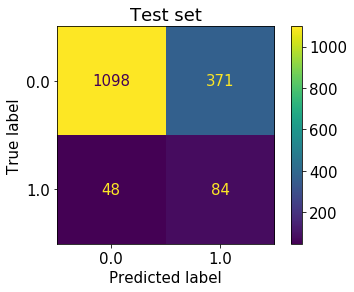

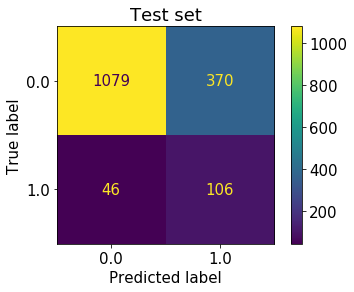

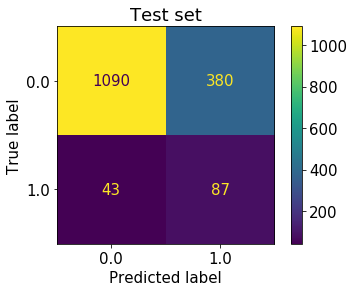

In [47]:
ut.k_fold_validator(X_training, y_training, forest, cv=5)

Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.727


Train mean recall: 0.54 +/- 0.01
Train mean precision: 0.23 +/- 0.01
Train mean ROC-AUC: 0.69 +/- 0.01


Test mean recall: 0.53 +/- 0.04
Test mean precision: 0.23 +/- 0.03
Test mean ROC-AUC: 0.68 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.41750     5.41750
heart_fail_binary  4.96550     4.96550
chron_bronc_binary 4.80950     4.80950
taking_ins_binary  4.44950     4.44950
ever_had_COPD      4.31210     4.31210
heart_cond_binary  3.57280     3.57280
num_rx             3.50360     3.50360
osteoarth_binary   3.37970     3.37970
asthma_binary      3.10880     3.10880
diabetes_binary    3.08280     3.08280
RIDRETH3_2.0       3.07880     3.07880
other_arth_binary  2.99400     2.99400
RIDRETH3_6.0       2.61720     2.61720
RIDRETH3_1.0       2.51360     2.51360
RIDRETH3_4.0       2.09260     2.09260
RIDRETH3_3.0       1.74720     1.74720
RIDAGEYR           1.49200  

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


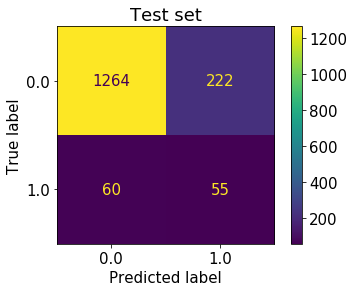

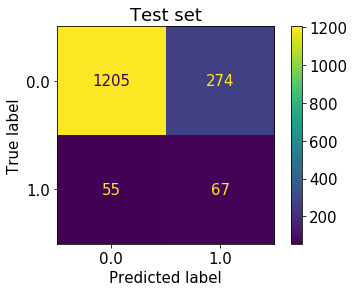

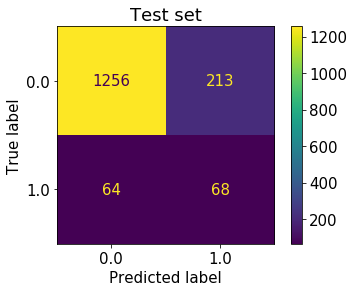

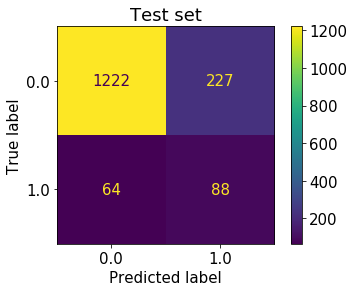

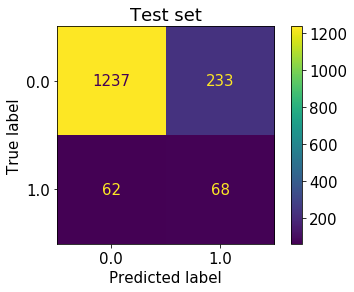

In [48]:
CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)

Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Mean ROC-AUC Score: 0.754


Train mean recall: 0.65 +/- 0.01
Train mean precision: 0.2 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.0


Test mean recall: 0.64 +/- 0.03
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.7 +/- 0.01


Feature weights: 
                      weight  abs_weight
num_rx              1.87470     1.87470
RIDAGEYR            1.10960     1.10960
heart_cond_binary   0.83140     0.83140
heart_fail_binary   0.75800     0.75800
osteoarth_binary    0.72380     0.72380
RIDRETH3_6.0       -0.48470     0.48470
ever_had_COPD       0.35940     0.35940
other_arth_binary   0.31490     0.31490
emphysema_binary    0.25740     0.25740
RIDRETH3_1.0       -0.21560     0.21560
RIDRETH3_4.0       -0.16850     0.16850
RIDRETH3_2.0        0.14820     0.14820
chron_bronc_binary  0.11150     0.11150
RIDRETH3_3.0       -0.05240     0.05240
asthma_binary       0.04600     0.04600
diabetes_binary     0.038

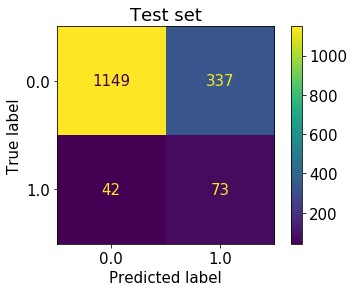

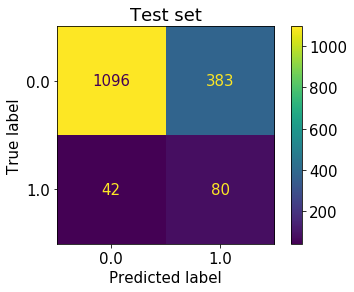

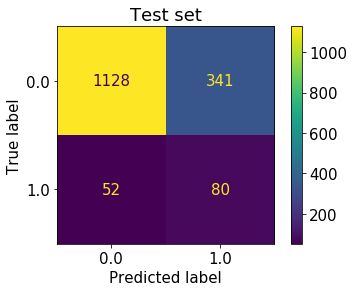

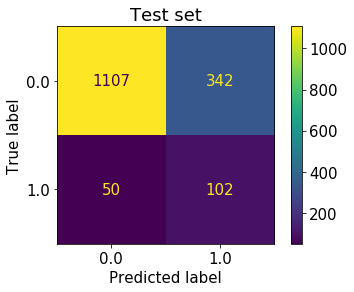

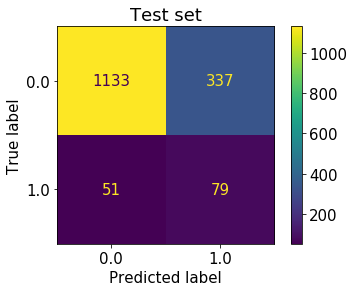

In [49]:
logreg = LogisticRegression(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, logreg)

In [51]:
binary_df_5 = pd.read_csv('data/binary_df_5').set_index('SEQN')
binary_df_5

RIDAGEYR  osteoarth_binary  other_arth_binary  \
SEQN                                                          
93703.00000    2.00000           0.00000            0.00000   
93704.00000    2.00000           0.00000            0.00000   
93705.00000   66.00000           0.00000            1.00000   
93706.00000   18.00000           0.00000            0.00000   
93707.00000   13.00000           0.00000            0.00000   
...                ...               ...                ...   
102952.00000  70.00000           0.00000            0.00000   
102953.00000  42.00000           0.00000            0.00000   
102954.00000  41.00000           0.00000            0.00000   
102955.00000  14.00000           0.00000            0.00000   
102956.00000  38.00000           1.00000            0.00000   

              heart_fail_binary  heart_cond_binary  ever_had_COPD  \
SEQN                                                                
93703.00000             0.00000            0.00000        0.00000   
93704.00000             0.00000            0.00000        0.00000   
93705.00000             0.00000            0.00000        0.00000   
93706.00000             0.00000            0.00000        0.00000   
93707.00000             0.00000            0.00000        0.00000   
...                         ...                ...            ...   
102952.00000            0.00000            0.00000        0.00000   
102953.00000            0.00000            0.00000        0.00000   
102954.00000            0.00000            0.00000        0.00000   
102955.00000            0.00000            0.00000        0.00000   
102956.00000            0.00000            0.00000        0.00000   

              emphysema_binary  chron_bronc_binary  asthma_binary  \
SEQN                                                                
93703.00000            0.00000             0.00000        0.00000   
93704.00000            0.00000             0.00000        0.00000   
93705.00000            0.00000             0.00000        0.00000   
93706.00000            0.00000             0.00000        0.00000   
93707.00000            0.00000             0.00000        0.00000   
...                        ...                 ...            ...   
102952.00000           0.00000             0.00000        0.00000   
102953.00000           0.00000             0.00000        0.00000   
102954.00000           0.00000             0.00000        0.00000   
102955.00000           0.00000             0.00000        0.00000   
102956.00000           0.00000             0.00000        0.00000   

              diabetes_binary  taking_ins_binary  updated_hosp  RIDRETH3_1.0  \
SEQN                                                                           
93703.00000           0.00000            0.00000       0.00000             0   
93704.00000           0.00000            0.00000       0.00000             0   
93705.00000           0.00000            0.00000       0.00000             0   
93706.00000           0.00000            0.00000       0.00000             0   
93707.00000           0.00000            0.00000       0.00000             0   
...                       ...                ...           ...           ...   
102952.00000          0.00000            0.00000       0.00000             0   
102953.00000          0.00000            0.00000       0.00000             1   
102954.00000          0.00000            0.00000       0.00000             0   
102955.00000          0.00000            0.00000       0.00000             0   
102956.00000          0.00000            0.00000       0.00000             0   

              RIDRETH3_2.0  RIDRETH3_3.0  RIDRETH3_4.0  RIDRETH3_6.0  num_rx  \
SEQN                                                                           
93703.00000              0             0             0             1 0.00000   
93704.00000              0             1             0             0 0.00000   
93705.00000              0           

In [52]:
# define X and y

X = binary_df_5.drop(columns = ['updated_hosp'])
y = binary_df_5['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)


Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.763


Train mean recall: 0.69 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.66 +/- 0.03
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.27340     0.27340
num_rx             0.24250     0.24250
heart_cond_binary  0.16620     0.16620
osteoarth_binary   0.11470     0.11470
heart_fail_binary  0.04200     0.04200
other_arth_binary  0.03300     0.03300
ever_had_COPD      0.03040     0.03040
diabetes_binary    0.02920     0.02920
unknown_dx         0.02400     0.02400
RIDRETH3_6.0       0.00940     0.00940
taking_ins_binary  0.00640     0.00640
RIDRETH3_2.0       0.00630     0.00630
chron_bronc_binary 0.00520     0.00520
asthma_binary      0.00510     0.00510
emphysema_binar

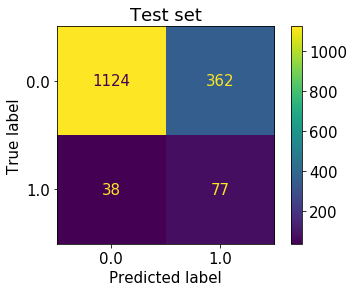

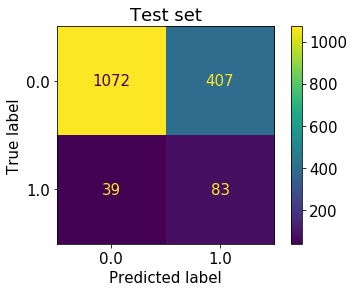

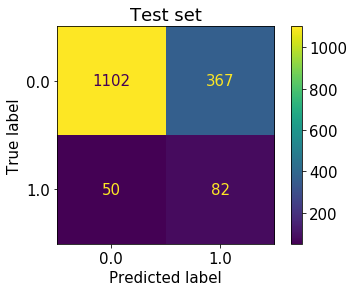

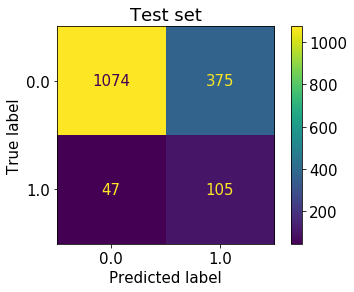

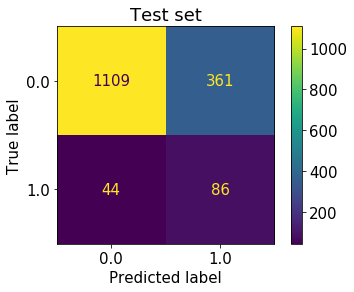

In [53]:
ut.k_fold_validator(X_training, y_training, forest, cv=5)

Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.731


Train mean recall: 0.55 +/- 0.01
Train mean precision: 0.23 +/- 0.01
Train mean ROC-AUC: 0.69 +/- 0.01


Test mean recall: 0.54 +/- 0.04
Test mean precision: 0.23 +/- 0.03
Test mean ROC-AUC: 0.69 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.43040     5.43040
heart_fail_binary  4.97840     4.97840
chron_bronc_binary 4.82240     4.82240
taking_ins_binary  4.46240     4.46240
unknown_dx         4.35940     4.35940
ever_had_COPD      4.32500     4.32500
heart_cond_binary  3.58560     3.58560
num_rx             3.51640     3.51640
osteoarth_binary   3.39260     3.39260
asthma_binary      3.12170     3.12170
diabetes_binary    3.09570     3.09570
RIDRETH3_2.0       3.09170     3.09170
other_arth_binary  3.00680     3.00680
RIDRETH3_6.0       2.63010     2.63010
RIDRETH3_1.0       2.52650     2.52650
RIDRETH3_4.0       2.10550     2.10550
RIDRETH3_3.0       1.76000  

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


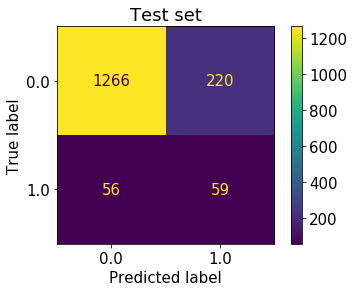

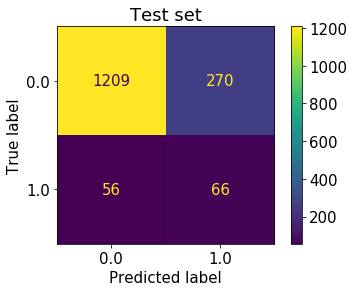

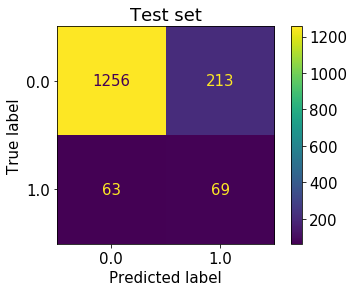

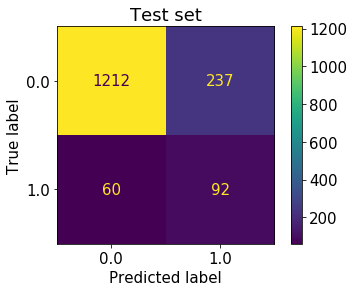

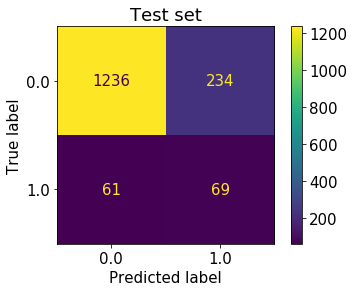

In [54]:
CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)


Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Mean ROC-AUC Score: 0.756


Train mean recall: 0.64 +/- 0.0
Train mean precision: 0.2 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.0


Test mean recall: 0.64 +/- 0.02
Test mean precision: 0.2 +/- 0.02
Test mean ROC-AUC: 0.7 +/- 0.01


Feature weights: 
                      weight  abs_weight
num_rx              1.60820     1.60820
RIDAGEYR            1.08490     1.08490
heart_cond_binary   0.80500     0.80500
heart_fail_binary   0.77380     0.77380
osteoarth_binary    0.76590     0.76590
unknown_dx          0.68620     0.68620
RIDRETH3_6.0       -0.49400     0.49400
ever_had_COPD       0.34780     0.34780
other_arth_binary   0.33660     0.33660
emphysema_binary    0.30480     0.30480
RIDRETH3_1.0       -0.23300     0.23300
RIDRETH3_4.0       -0.19200     0.19200
RIDRETH3_2.0        0.13720     0.13720
chron_bronc_binary  0.09120     0.09120
RIDRETH3_3.0       -0.07820     0.07820
diabetes_binary     0.06970

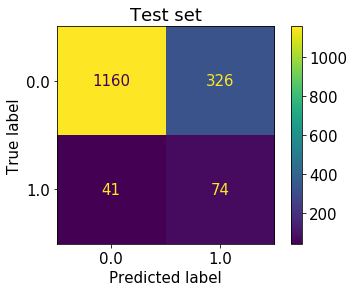

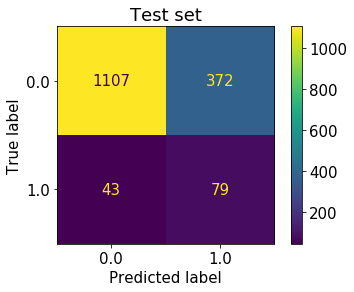

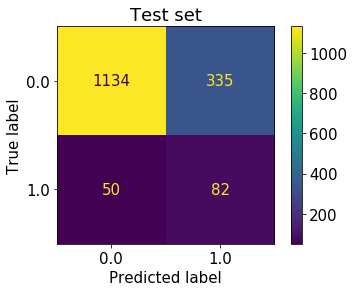

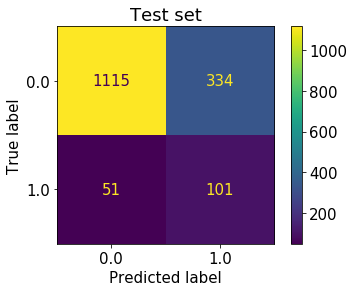

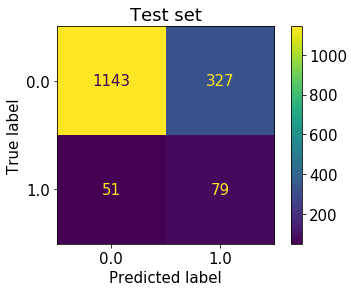

In [55]:
logreg = LogisticRegression(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, logreg)


In [57]:
# try age buckets instead of continuous age

binary_df_6 = pd.read_csv('data/binary_df_6').set_index('SEQN')
binary_df_6

osteoarth_binary  other_arth_binary  heart_fail_binary  \
SEQN                                                                   
93703.00000            0.00000            0.00000            0.00000   
93704.00000            0.00000            0.00000            0.00000   
93705.00000            0.00000            1.00000            0.00000   
93706.00000            0.00000            0.00000            0.00000   
93707.00000            0.00000            0.00000            0.00000   
...                        ...                ...                ...   
102952.00000           0.00000            0.00000            0.00000   
102953.00000           0.00000            0.00000            0.00000   
102954.00000           0.00000            0.00000            0.00000   
102955.00000           0.00000            0.00000            0.00000   
102956.00000           1.00000            0.00000            0.00000   

              heart_cond_binary  ever_had_COPD  emphysema_binary  \
SEQN                                                               
93703.00000             0.00000        0.00000           0.00000   
93704.00000             0.00000        0.00000           0.00000   
93705.00000             0.00000        0.00000           0.00000   
93706.00000             0.00000        0.00000           0.00000   
93707.00000             0.00000        0.00000           0.00000   
...                         ...            ...               ...   
102952.00000            0.00000        0.00000           0.00000   
102953.00000            0.00000        0.00000           0.00000   
102954.00000            0.00000        0.00000           0.00000   
102955.00000            0.00000        0.00000           0.00000   
102956.00000            0.00000        0.00000           0.00000   

              chron_bronc_binary  asthma_binary  diabetes_binary  \
SEQN                                                               
93703.00000              0.00000        0.00000          0.00000   
93704.00000              0.00000        0.00000          0.00000   
93705.00000              0.00000        0.00000          0.00000   
93706.00000              0.00000        0.00000          0.00000   
93707.00000              0.00000        0.00000          0.00000   
...                          ...            ...              ...   
102952.00000             0.00000        0.00000          0.00000   
102953.00000             0.00000        0.00000          0.00000   
102954.00000             0.00000        0.00000          0.00000   
102955.00000             0.00000        0.00000          0.00000   
102956.00000             0.00000        0.00000          0.00000   

              taking_ins_binary  updated_hosp  RIDRETH3_1.0  RIDRETH3_2.0  \
SEQN                                                                        
93703.00000             0.00000       0.00000             0             0   
93704.00000             0.00000       0.00000             0             0   
93705.00000             0.00000       0.00000             0             0   
93706.00000             0.00000       0.00000             0             0   
93707.00000             0.00000       0.00000             0             0   
...                         ...           ...           ...           ...   
102952.00000            0.00000       0.00000             0             0   
102953.00000            0.00000       0.00000             1             0   
102954.00000            0.00000       0.00000             0             0   
102955.00000            0.00000       0.00000             0             0   
102956.00000            0.00000       0.00000             0             0   

              RIDRETH3_3.0  RIDRETH3_4.0  RIDRETH3_6.0  num_rx  unknown_dx  \
SEQN                                                                         
93703.00000              0             0             1 0.00000     0.00000   
93704.00000              1             0             0 0.00000     0.00

In [58]:
# define X and y

X = binary_df_6.drop(columns = ['updated_hosp'])
y = binary_df_6['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)


Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.76


Train mean recall: 0.69 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.68 +/- 0.03
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                     weight  abs_weight
num_rx             0.34220     0.34220
heart_cond_binary  0.15060     0.15060
age_70+            0.12740     0.12740
osteoarth_binary   0.11330     0.11330
heart_fail_binary  0.04880     0.04880
diabetes_binary    0.03990     0.03990
other_arth_binary  0.03580     0.03580
unknown_dx         0.03100     0.03100
ever_had_COPD      0.02850     0.02850
RIDRETH3_6.0       0.00850     0.00850
taking_ins_binary  0.00830     0.00830
age_60-69          0.00820     0.00820
chron_bronc_binary 0.00770     0.00770
age_50-59          0.00770     0.00770
emphysema_binary

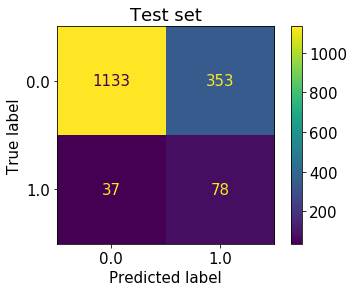

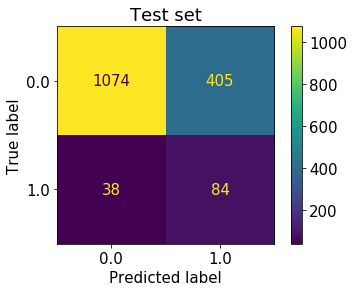

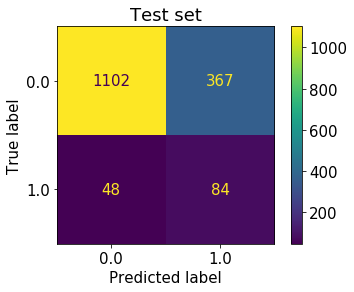

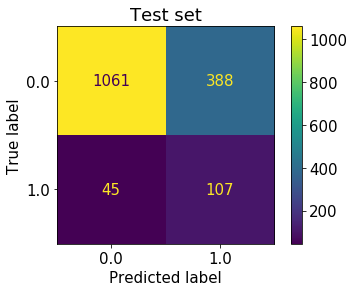

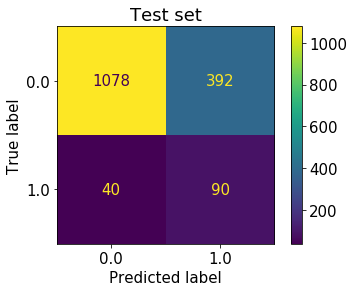

In [59]:
ut.k_fold_validator(X_training, y_training, forest, cv=5)

Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.725


Train mean recall: 0.61 +/- 0.01
Train mean precision: 0.22 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.0


Test mean recall: 0.6 +/- 0.05
Test mean precision: 0.22 +/- 0.03
Test mean ROC-AUC: 0.7 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.59410     5.59410
heart_fail_binary  5.14210     5.14210
chron_bronc_binary 4.98610     4.98610
taking_ins_binary  4.62610     4.62610
unknown_dx         4.52310     4.52310
ever_had_COPD      4.48870     4.48870
heart_cond_binary  3.74940     3.74940
num_rx             3.68020     3.68020
osteoarth_binary   3.55640     3.55640
asthma_binary      3.28540     3.28540
diabetes_binary    3.25940     3.25940
RIDRETH3_2.0       3.25550     3.25550
other_arth_binary  3.17060     3.17060
age_50-59          3.12120     3.12120
age_0-5            3.11430     3.11430
age_70+            3.11430     3.11430
age_60-69          2.91370     

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


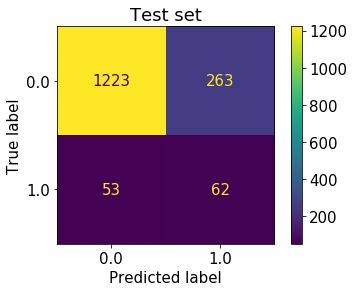

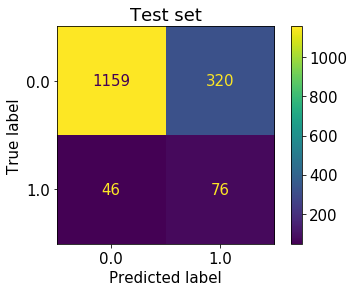

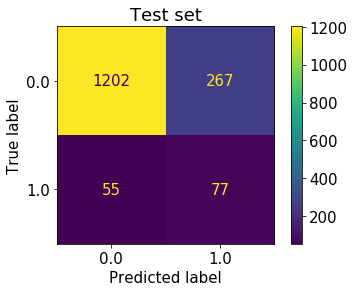

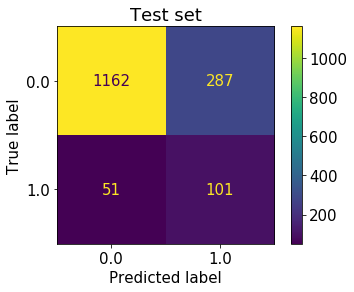

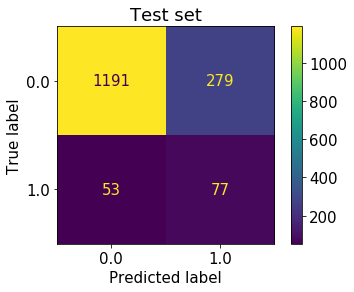

In [60]:
CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)

Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Mean ROC-AUC Score: 0.758


Train mean recall: 0.65 +/- 0.01
Train mean precision: 0.21 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.63 +/- 0.03
Test mean precision: 0.21 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                      weight  abs_weight
num_rx              1.77690     1.77690
age_70+             1.24830     1.24830
age_50-59           0.88940     0.88940
osteoarth_binary    0.83670     0.83670
heart_cond_binary   0.83300     0.83300
age_18-49           0.77550     0.77550
heart_fail_binary   0.76040     0.76040
unknown_dx          0.66560     0.66560
age_60-69           0.59970     0.59970
RIDRETH3_6.0       -0.48420     0.48420
other_arth_binary   0.38760     0.38760
ever_had_COPD       0.36420     0.36420
emphysema_binary    0.29250     0.29250
age_0-5             0.25060     0.25060
RIDRETH3_1.0       -0.20330     0.20330
RIDRETH3_4.0       -0.1

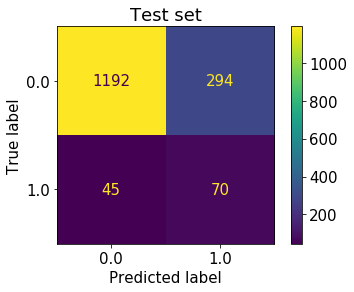

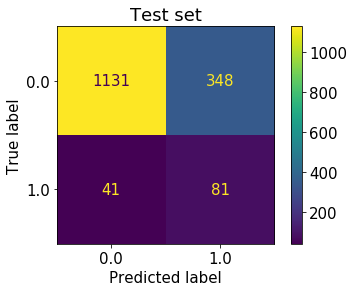

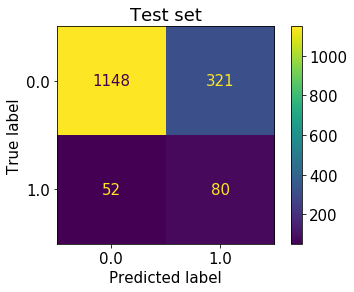

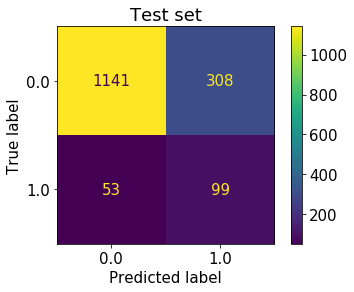

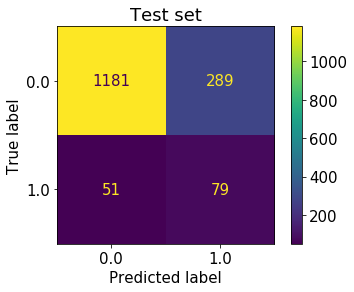

In [61]:
logreg = LogisticRegression(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, logreg)

In [64]:
# add feature for current liver condition

binary_df_7 = pd.read_csv('data/binary_df_7').set_index('SEQN')
binary_df_7

osteoarth_binary  other_arth_binary  heart_fail_binary  \
SEQN                                                                   
93703.00000            0.00000            0.00000            0.00000   
93704.00000            0.00000            0.00000            0.00000   
93705.00000            0.00000            1.00000            0.00000   
93706.00000            0.00000            0.00000            0.00000   
93707.00000            0.00000            0.00000            0.00000   
...                        ...                ...                ...   
102952.00000           0.00000            0.00000            0.00000   
102953.00000           0.00000            0.00000            0.00000   
102954.00000           0.00000            0.00000            0.00000   
102955.00000           0.00000            0.00000            0.00000   
102956.00000           1.00000            0.00000            0.00000   

              heart_cond_binary  ever_had_COPD  emphysema_binary  \
SEQN                                                               
93703.00000             0.00000        0.00000           0.00000   
93704.00000             0.00000        0.00000           0.00000   
93705.00000             0.00000        0.00000           0.00000   
93706.00000             0.00000        0.00000           0.00000   
93707.00000             0.00000        0.00000           0.00000   
...                         ...            ...               ...   
102952.00000            0.00000        0.00000           0.00000   
102953.00000            0.00000        0.00000           0.00000   
102954.00000            0.00000        0.00000           0.00000   
102955.00000            0.00000        0.00000           0.00000   
102956.00000            0.00000        0.00000           0.00000   

              chron_bronc_binary  asthma_binary  diabetes_binary  \
SEQN                                                               
93703.00000              0.00000        0.00000          0.00000   
93704.00000              0.00000        0.00000          0.00000   
93705.00000              0.00000        0.00000          0.00000   
93706.00000              0.00000        0.00000          0.00000   
93707.00000              0.00000        0.00000          0.00000   
...                          ...            ...              ...   
102952.00000             0.00000        0.00000          0.00000   
102953.00000             0.00000        0.00000          0.00000   
102954.00000             0.00000        0.00000          0.00000   
102955.00000             0.00000        0.00000          0.00000   
102956.00000             0.00000        0.00000          0.00000   

              taking_ins_binary  updated_hosp  RIDRETH3_1.0  RIDRETH3_2.0  \
SEQN                                                                        
93703.00000             0.00000       0.00000             0             0   
93704.00000             0.00000       0.00000             0             0   
93705.00000             0.00000       0.00000             0             0   
93706.00000             0.00000       0.00000             0             0   
93707.00000             0.00000       0.00000             0             0   
...                         ...           ...           ...           ...   
102952.00000            0.00000       0.00000             0             0   
102953.00000            0.00000       0.00000             1             0   
102954.00000            0.00000       0.00000             0             0   
102955.00000            0.00000       0.00000             0             0   
102956.00000            0.00000       0.00000             0             0   

              RIDRETH3_3.0  RIDRETH3_4.0  RIDRETH3_6.0  num_rx  unknown_dx  \
SEQN                                                                         
93703.00000              0             0             1 0.00000     0.00000   
93704.00000              1             0             0 0.00000     0.00

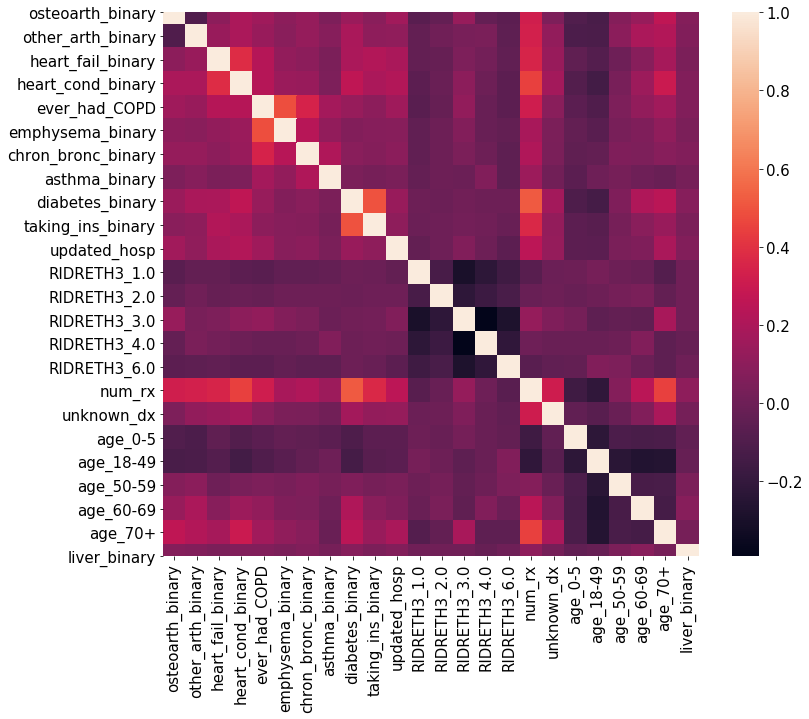

In [65]:
# recheck feature correlations since new features have been added

corr = binary_df_7.corr()

plt.figure(figsize = (12,10))
sns.heatmap(corr)

# number of rx is correlated with lots of conditions, but not more than 50%
# COPD and emphysema correlated about 50%

In [66]:
# define X and y

X = binary_df_7.drop(columns = ['updated_hosp'])
y = binary_df_7['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)



In [67]:
# check how many ppl have current liver condition
binary_df_7['liver_binary'].value_counts()

# very few, but because it has a heavy weight, let's keep it in for now

0    8760
1     134
Name: liver_binary, dtype: int64

Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.76


Train mean recall: 0.69 +/- 0.01
Train mean precision: 0.2 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.67 +/- 0.02
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                     weight  abs_weight
num_rx             0.30000     0.30000
heart_cond_binary  0.17430     0.17430
age_70+            0.12590     0.12590
osteoarth_binary   0.11660     0.11660
heart_fail_binary  0.06180     0.06180
diabetes_binary    0.04450     0.04450
other_arth_binary  0.03950     0.03950
unknown_dx         0.02980     0.02980
ever_had_COPD      0.02680     0.02680
chron_bronc_binary 0.00940     0.00940
taking_ins_binary  0.00910     0.00910
age_18-49          0.00900     0.00900
RIDRETH3_6.0       0.00760     0.00760
age_50-59          0.00730     0.00730
emphysema_binary 

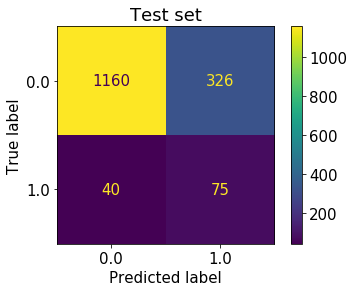

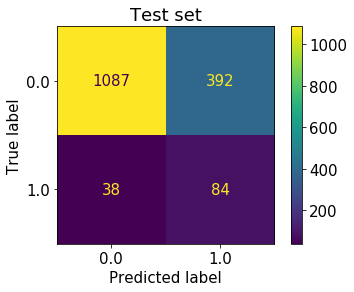

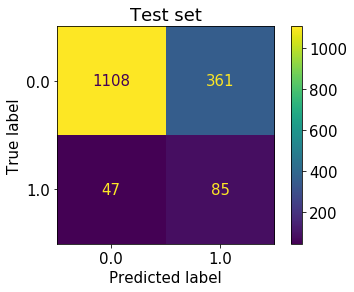

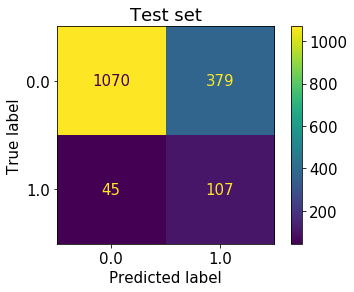

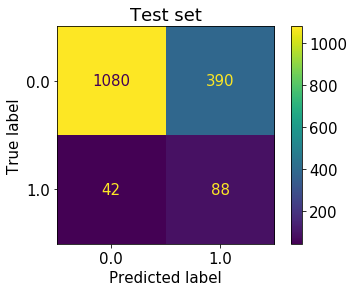

In [68]:
ut.k_fold_validator(X_training, y_training, forest, cv=5)

Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.726


Train mean recall: 0.61 +/- 0.01
Train mean precision: 0.22 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.01


Test mean recall: 0.6 +/- 0.04
Test mean precision: 0.21 +/- 0.03
Test mean ROC-AUC: 0.7 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.59970     5.59970
liver_binary       5.18750     5.18750
heart_fail_binary  5.14770     5.14770
chron_bronc_binary 4.99170     4.99170
taking_ins_binary  4.63170     4.63170
unknown_dx         4.52870     4.52870
ever_had_COPD      4.49430     4.49430
heart_cond_binary  3.75500     3.75500
num_rx             3.68580     3.68580
osteoarth_binary   3.56200     3.56200
asthma_binary      3.29100     3.29100
diabetes_binary    3.26500     3.26500
RIDRETH3_2.0       3.26110     3.26110
other_arth_binary  3.17620     3.17620
age_50-59          3.12680     3.12680
age_0-5            3.11990     3.11990
age_70+            3.11990    

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


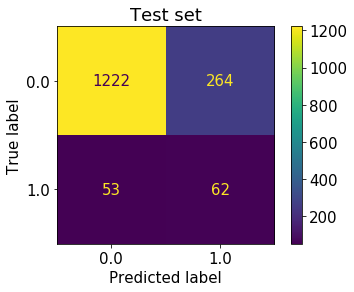

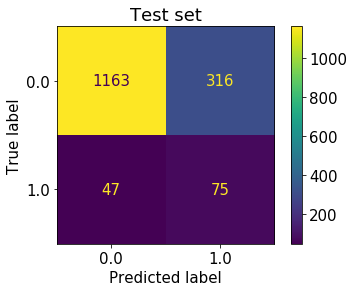

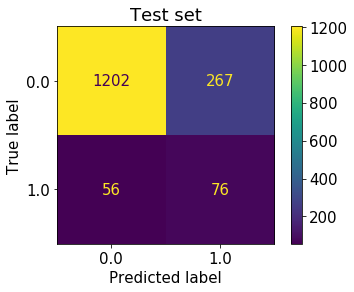

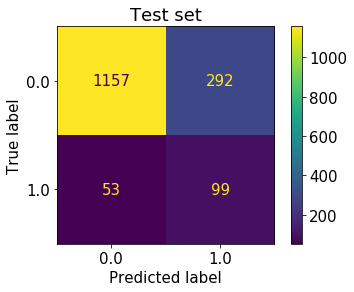

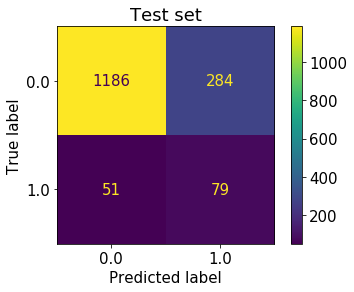

In [69]:
CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)

Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Mean ROC-AUC Score: 0.758


Train mean recall: 0.65 +/- 0.01
Train mean precision: 0.21 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.63 +/- 0.02
Test mean precision: 0.21 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                      weight  abs_weight
num_rx              1.77060     1.77060
age_70+             1.24870     1.24870
age_50-59           0.88970     0.88970
osteoarth_binary    0.83180     0.83180
heart_cond_binary   0.83090     0.83090
age_18-49           0.77450     0.77450
heart_fail_binary   0.76030     0.76030
unknown_dx          0.66560     0.66560
age_60-69           0.59790     0.59790
RIDRETH3_6.0       -0.48740     0.48740
other_arth_binary   0.38760     0.38760
ever_had_COPD       0.36490     0.36490
emphysema_binary    0.29440     0.29440
age_0-5             0.25030     0.25030
RIDRETH3_1.0       -0.20520     0.20520
RIDRETH3_4.0       -0.1

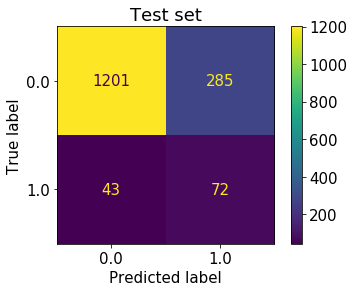

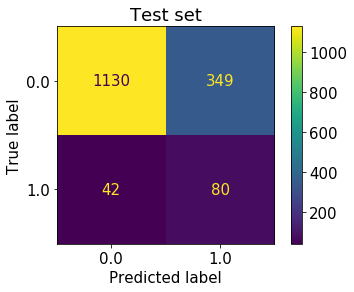

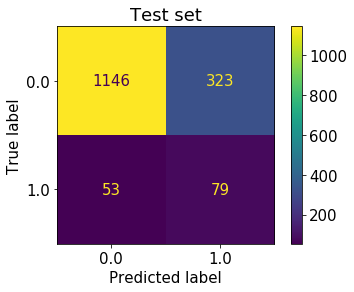

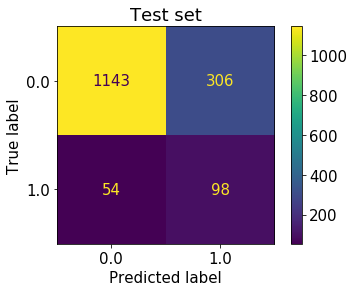

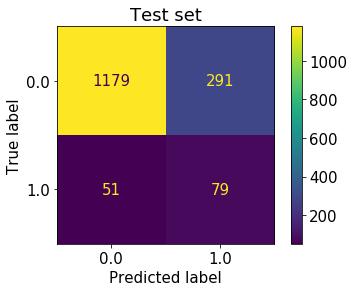

In [70]:
logreg = LogisticRegression(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, logreg)

Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.74


Train mean recall: 0.6 +/- 0.01
Train mean precision: 0.22 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.01


Test mean recall: 0.59 +/- 0.04
Test mean precision: 0.22 +/- 0.03
Test mean ROC-AUC: 0.7 +/- 0.01


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.43540     5.43540
liver_binary       5.02320     5.02320
heart_fail_binary  4.98340     4.98340
chron_bronc_binary 4.82740     4.82740
taking_ins_binary  4.46740     4.46740
unknown_dx         4.36440     4.36440
ever_had_COPD      4.33000     4.33000
heart_cond_binary  3.59070     3.59070
num_rx             3.52150     3.52150
osteoarth_binary   3.39770     3.39770
asthma_binary      3.12670     3.12670
diabetes_binary    3.10070     3.10070
RIDRETH3_2.0       3.09680     3.09680
other_arth_binary  3.01190     3.01190
age_50-59          2.96250     2.96250
age_0-5            2.95560     2.95560
age_70+            2.95560     

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


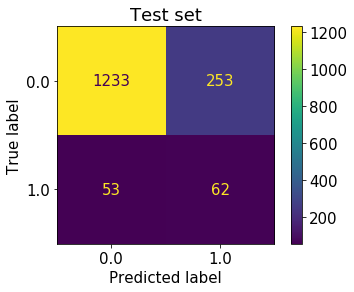

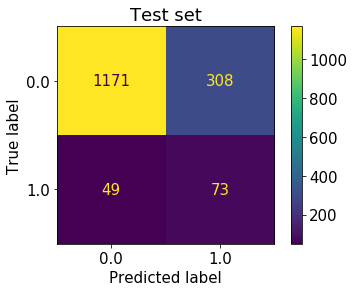

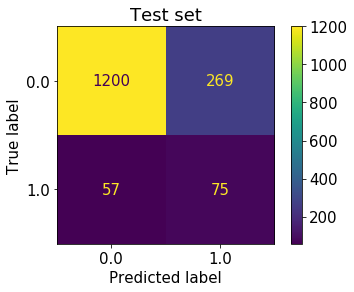

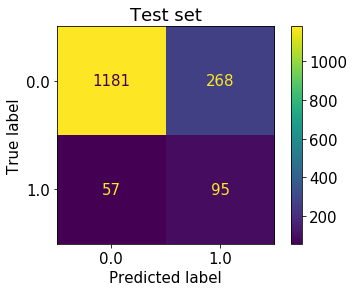

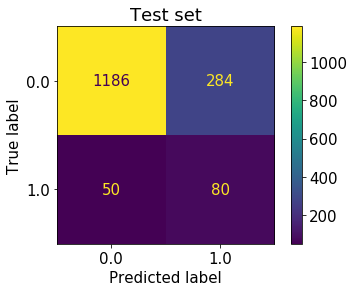

In [71]:
# try dropping column with lowest weight

X = binary_df_7.drop(columns = ['updated_hosp', 'age_18-49'])
y = binary_df_7['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)

# try Complement Naive Bayes

CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)

# no improvement

In [72]:
binary_df_8 = pd.read_csv('data/binary_df_8').set_index('SEQN')
binary_df_8.head()

osteoarth_binary  other_arth_binary  heart_fail_binary  \
SEQN                                                                  
93703.00000           0.00000            0.00000            0.00000   
93704.00000           0.00000            0.00000            0.00000   
93705.00000           0.00000            1.00000            0.00000   
93706.00000           0.00000            0.00000            0.00000   
93707.00000           0.00000            0.00000            0.00000   

             heart_cond_binary  ever_had_COPD  emphysema_binary  \
SEQN                                                              
93703.00000            0.00000        0.00000           0.00000   
93704.00000            0.00000        0.00000           0.00000   
93705.00000            0.00000        0.00000           0.00000   
93706.00000            0.00000        0.00000           0.00000   
93707.00000            0.00000        0.00000           0.00000   

             chron_bronc_binary  asthma_binary  diabetes_binary  \
SEQN                                                              
93703.00000             0.00000        0.00000          0.00000   
93704.00000             0.00000        0.00000          0.00000   
93705.00000             0.00000        0.00000          0.00000   
93706.00000             0.00000        0.00000          0.00000   
93707.00000             0.00000        0.00000          0.00000   

             taking_ins_binary  updated_hosp  RIDRETH3_1.0  RIDRETH3_2.0  \
SEQN                                                                       
93703.00000            0.00000       0.00000             0             0   
93704.00000            0.00000       0.00000             0             0   
93705.00000            0.00000       0.00000             0             0   
93706.00000            0.00000       0.00000             0             0   
93707.00000            0.00000       0.00000             0             0   

             RIDRETH3_3.0  RIDRETH3_4.0  RIDRETH3_6.0  num_rx  unknown_dx  \
SEQN                                                                        
93703.00000             0             0             1 0.00000     0.00000   
93704.00000             1             0             0 0.00000     0.00000   
93705.00000             0             1             0 2.00000     0.00000   
93706.00000             0             0             1 0.00000     0.00000   
93707.00000             0             0             0 0.00000     0.00000   

             age_0-5  age_18-49  age_50-59  age_60-69  age_70+  liver_binary  \
SEQN                                                                           
93703.00000        1          0          0          0        0             0   
93704.00000        1          0          0          0        0             0   
93705.00000        0          0          0          1        0             0   
93706.00000        0          1          0          0        0             0   
93707.00000        0          0          0          0        0             0   

             recent_cancer  
SEQN                        
93703.00000              0  
93704.00000              0  
93705.00000              0  
93706.00000              0  
93707.00000              0

In [73]:
# try adding recent cancer dx

X = binary_df_8.drop(columns = ['updated_hosp'])
y = binary_df_8['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)



Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.762


Train mean recall: 0.69 +/- 0.01
Train mean precision: 0.2 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.67 +/- 0.03
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                     weight  abs_weight
num_rx             0.25710     0.25710
heart_cond_binary  0.17920     0.17920
age_70+            0.15510     0.15510
osteoarth_binary   0.11940     0.11940
diabetes_binary    0.05300     0.05300
heart_fail_binary  0.03930     0.03930
ever_had_COPD      0.03560     0.03560
other_arth_binary  0.03500     0.03500
unknown_dx         0.03110     0.03110
recent_cancer      0.01710     0.01710
chron_bronc_binary 0.01020     0.01020
age_18-49          0.00880     0.00880
age_50-59          0.00860     0.00860
age_0-5            0.00850     0.00850
taking_ins_binar

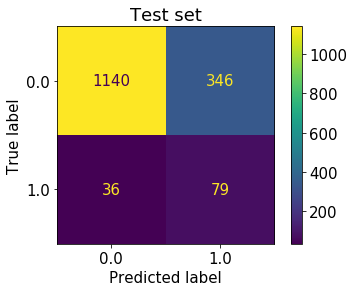

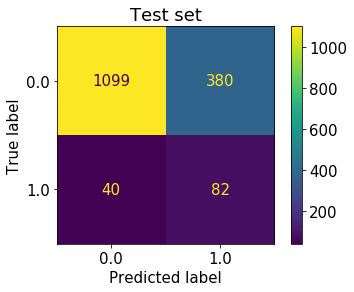

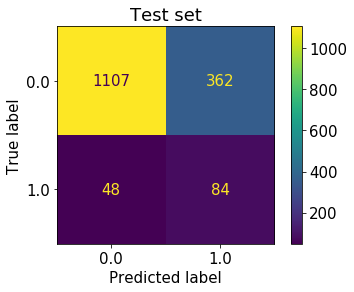

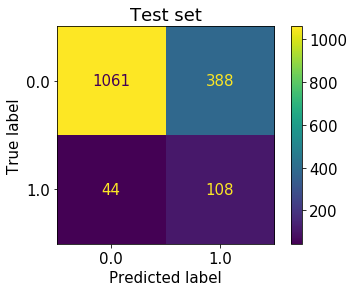

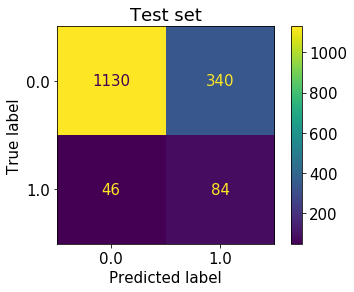

In [74]:
ut.k_fold_validator(X_training, y_training, forest, cv=5)

Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.728


Train mean recall: 0.61 +/- 0.01
Train mean precision: 0.22 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.0


Test mean recall: 0.6 +/- 0.05
Test mean precision: 0.21 +/- 0.03
Test mean ROC-AUC: 0.7 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.61250     5.61250
liver_binary       5.20020     5.20020
heart_fail_binary  5.16050     5.16050
chron_bronc_binary 5.00450     5.00450
taking_ins_binary  4.64450     4.64450
unknown_dx         4.54140     4.54140
ever_had_COPD      4.50710     4.50710
recent_cancer      4.36850     4.36850
heart_cond_binary  3.76770     3.76770
num_rx             3.69850     3.69850
osteoarth_binary   3.57470     3.57470
asthma_binary      3.30380     3.30380
diabetes_binary    3.27780     3.27780
RIDRETH3_2.0       3.27380     3.27380
other_arth_binary  3.18890     3.18890
age_50-59          3.13950     3.13950
age_0-5            3.13270     

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


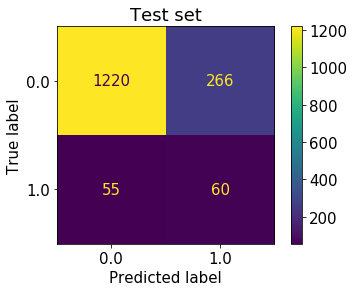

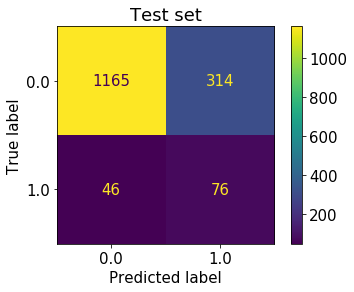

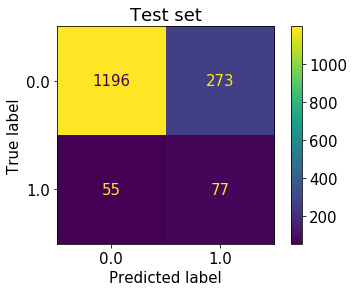

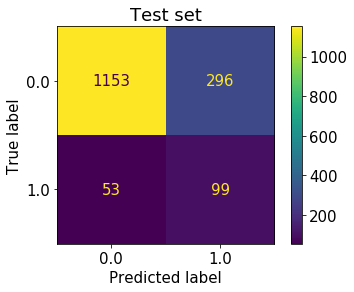

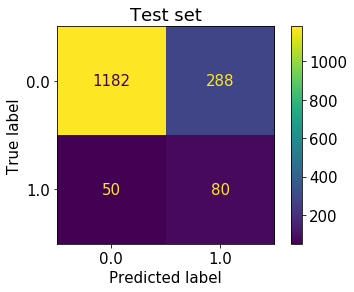

In [75]:
CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)

Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Mean ROC-AUC Score: 0.759


Train mean recall: 0.65 +/- 0.01
Train mean precision: 0.21 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.64 +/- 0.02
Test mean precision: 0.21 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                      weight  abs_weight
num_rx              1.71800     1.71800
age_70+             1.18570     1.18570
age_50-59           0.86320     0.86320
osteoarth_binary    0.85310     0.85310
heart_cond_binary   0.82380     0.82380
heart_fail_binary   0.77500     0.77500
age_18-49           0.76450     0.76450
unknown_dx          0.66960     0.66960
age_60-69           0.56090     0.56090
recent_cancer       0.51150     0.51150
RIDRETH3_6.0       -0.47450     0.47450
other_arth_binary   0.37750     0.37750
ever_had_COPD       0.36100     0.36100
emphysema_binary    0.27640     0.27640
age_0-5             0.25180     0.25180
RIDRETH3_1.0       -0.1

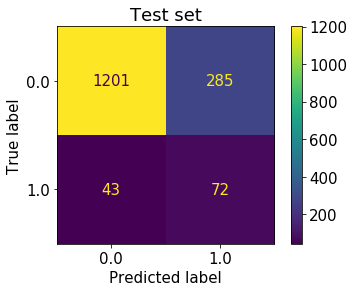

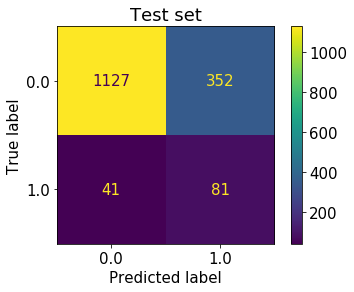

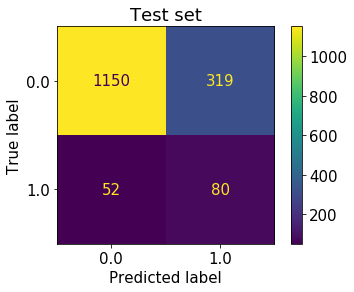

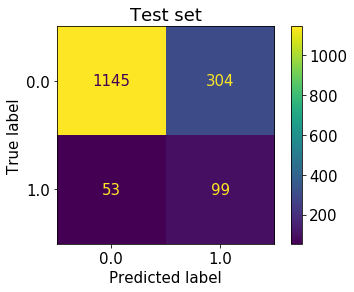

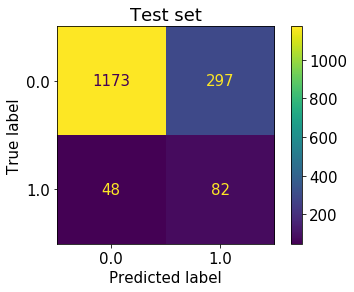

In [76]:
logreg = LogisticRegression(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, logreg)

Classifier: AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         max_depth=6,
                                                         min_samples_split=300),
                   n_estimators=100)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.676


Train mean recall: 0.73 +/- 0.02
Train mean precision: 0.29 +/- 0.02
Train mean ROC-AUC: 0.79 +/- 0.0


Test mean recall: 0.49 +/- 0.07
Test mean precision: 0.19 +/- 0.03
Test mean ROC-AUC: 0.65 +/- 0.03




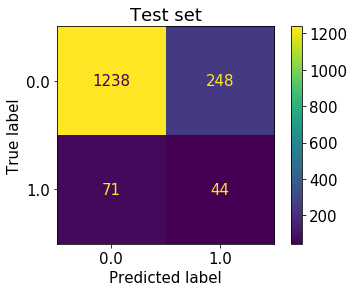

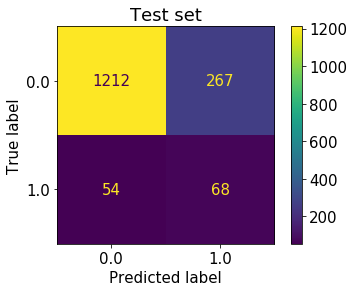

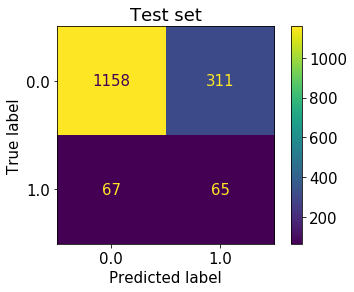

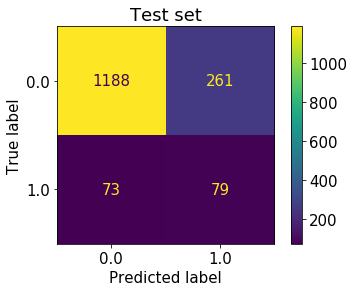

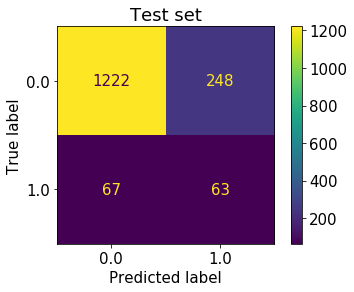

In [77]:
Ada = AdaBoostClassifier(base_estimator=forest, n_estimators=100)

ut.k_fold_validator(X_training, y_training, Ada)

Train recall score: 0.69
Train precision score: 0.2
Train ROC-AUC score: 0.72


Holdout recall score: 0.7
Holdout precision score: 0.18
Holdout ROC-AUC score: 0.73




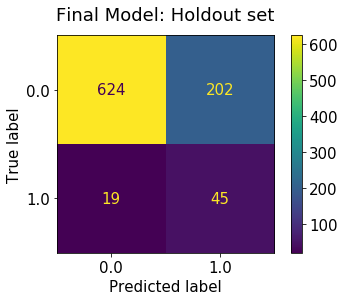

In [80]:
# test holdout set with binary_df_8 and all columns

X = binary_df_8.drop(columns = ['updated_hosp'])
y = binary_df_8['updated_hosp']

forest.fit(X_training, y_training)

y_pred_train = forest.predict(X_training)
y_pred_holdout = forest.predict(X_holdout)

print('Train recall score:', round(recall_score(y_training, y_pred_train), 2))
print('Train precision score:', round(precision_score(y_training, y_pred_train), 2)) 
print('Train ROC-AUC score:', round(roc_auc_score(y_training, y_pred_train), 2)) 
print('\n')
print('Holdout recall score:', round(recall_score(y_holdout, y_pred_holdout), 2))
print('Holdout precision score:', round(precision_score(y_holdout, y_pred_holdout), 2))  
print('Holdout ROC-AUC score:', round(roc_auc_score(y_holdout, y_pred_holdout), 2)) 
print('\n')

plot_confusion_matrix(forest, X_holdout, y_holdout)
plt.title('Final Model: Holdout set', fontsize=18, pad=15);
# plt.savefig('images/final-model-holdout')

Train recall score: 0.65
Train precision score: 0.21
Train ROC-AUC score: 0.72


Holdout recall score: 0.69
Holdout precision score: 0.21
Holdout ROC-AUC score: 0.74


0.744476392251816


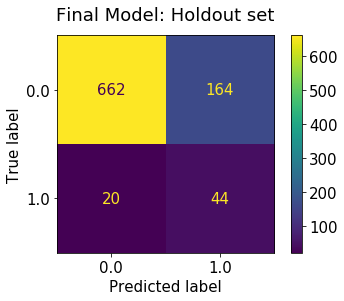

In [81]:
# try Logistic Regression

logreg.fit(X_training, y_training)

y_pred_train = logreg.predict(X_training)
y_pred_holdout = logreg.predict(X_holdout)

print('Train recall score:', round(recall_score(y_training, y_pred_train), 2))
print('Train precision score:', round(precision_score(y_training, y_pred_train), 2)) 
print('Train ROC-AUC score:', round(roc_auc_score(y_training, y_pred_train), 2)) 
print('\n')
print('Holdout recall score:', round(recall_score(y_holdout, y_pred_holdout), 2))
print('Holdout precision score:', round(precision_score(y_holdout, y_pred_holdout), 2))  
print('Holdout ROC-AUC score:', round(roc_auc_score(y_holdout, y_pred_holdout), 2)) 
print('\n')

plot_confusion_matrix(logreg, X_holdout, y_holdout)
plt.title('Final Model: Holdout set', fontsize=18, pad=15);
# plt.savefig('images/final-model-holdout')